# Исследование тарифов сотового оператора

# Оглавление:
* [Задача](#1)
* [I. Подготовка к исследованию, загрузка и ознакомление с данными](#2)
* [II. Предобработка данных](#3)
* [III. Объединение и дополнение таблиц](#4)
* [IV. Анализ данных](#5)
* [V. Выводы](#6)

# Задача <a class="anchor" id="1"></a>

"Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше".

# I. Подготовка к исследованию, загрузка и ознакомление с данными <a class="anchor" id="2"></a>

## 1. Подготовка к исследованию

**Объявляем класс DataExplorer и наполняем его методами**

In [1]:
class DataExplorer:
    
    def histogram(self, data, n_bins, range_start, range_end, grid, cumulative=False, x_label = "", y_label = "", title = ""):
        """
        data - датасет
        n_bins - количество корзин
        range_start - минимальный икс для корзины
        range_end - максимальный икс для корзины
        grid - рисовать сетку или нет (False / True)
        
        
        histogram(data, n_bins, range_start, range_end, grid, x_label = "", y_label = "", title = "")
        
        Пример:
        histogram(df, 100, 0, 150, True, 'Количество иксов', 'Количество игриков', 'Заголовок')
        """
        # Создаем объект - график
        _, ax = plt.subplots()

        # Задаем параметры
        ax.hist(data, bins = n_bins, range = (range_start, range_end), cumulative = cumulative, color = '#4169E1')

        # Добавляем сетку
        if grid == True:
            ax.grid(color='grey', linestyle='-', linewidth=0.5)
        else:
            pass

        # Добавляем медиану, среднее и квартили
        ax.axvline(data.median(),linestyle = '--', color = '#FF1493', label = 'median')
        ax.axvline(data.mean(),linestyle = '--', color = 'orange', label = 'mean')
        ax.axvline(data.quantile(0.1),linestyle = '--', color = 'yellow', label = '1%')
        ax.axvline(data.quantile(0.99),linestyle = '--', color = 'yellow', label = '99%')
        ax.legend()
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        ax.set_title(title)
        
    def scatterplot(self, x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False, figsize = (8, 6)):

        # Создаем объект - график
        _, ax = plt.subplots(figsize = (8, 6))

        # Задаем параметры для графика, определяем размер (s), цвет и прозрачность точек на графике
        ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

        if yscale_log == True:
            ax.set_yscale('log')

        # Создаем описание осей и заголовок для графика
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        
    def overlaid_histogram(self, data1, data2, n_bins = 0, data1_name="", data1_color="#539caf", data2_name="", data2_color="#7663b0", x_label="", y_label="", title=""):
        # Устанавливаем границы для корзин так чтобы оба распределения на графике были соотносимы
        max_nbins = 10
        data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
        binwidth = (data_range[1] - data_range[0]) / max_nbins


        if n_bins == 0:
            bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
        else: 
            bins = n_bins

        # Рисуем график
        _, ax = plt.subplots(figsize=(10,8))
        ax.hist(data1, bins = bins, color = data1_color, alpha = 0.65, label = data1_name)
        ax.hist(data2, bins = bins, color = data2_color, alpha = 0.65, label = data2_name)
        
        ax.axvline(data1.mean(),linestyle = '--', color = 'lime', label = 'mean for data 1')
                
        ax.axvline(data2.mean(),linestyle = '--', color = 'coral', label = 'mean for data 2')
                
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        ax.set_title(title)
        ax.legend(loc = 'best')
        
    def corr_diagram(self, x):
        plt.figure(figsize=(12,10), dpi= 80)
        sns.heatmap(x.corr(), xticklabels=x.corr().columns, yticklabels=x.corr().columns, cmap='RdYlGn', center=0, annot=True)
        plt.title('Диаграмма корреляции', fontsize=22)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
        
        
    def highlight_max(self, data, color='yellow'):
        '''
        highlight the maximum in a Series or DataFrame
        '''
        attr = 'background-color: {}'.format(color)
        #remove % and cast to float
        data = data.replace('%','', regex=True).astype(float)
        data[data == 1] = None
        if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
            is_max = (data == data.abs().max()) & (data !=1) 
            return [attr if v else '' for v in is_max]
        else:  # from .apply(axis=None)
            is_max = (data == data.abs().max()) & (data !=1) 
            return pd.DataFrame(np.where(is_max, attr, ''),
                                index=data.index, columns=data.columns)
    
    
    def highlight_sorted_corr(self, data, color='#00FF00'):
        '''
        highlight the maximum in a Series or DataFrame
        '''
        attr = 'background-color: {}'.format(color)
        #remove % and cast to float
        data = data.replace('%','', regex=True).astype(float)
        data[data == 1] = None
        if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
            is_max = (data > 0.1) & (data !=1) 
            return [attr if v else '' for v in is_max]
        else:  # from .apply(axis=None)
            is_max = (data == data.abs().max()) & (data !=1) 
            return pd.DataFrame(np.where(is_max, attr, ''),
                                index=data.index, columns=data.columns)
        
        
    def lineplot(self, x_data, y_data, x_label="", y_label="", title=""):
        # Создаем объект - график
        _, ax = plt.subplots()

        # Задаем параметры для линии: ширину (lw), цвет и прозрачность (alpha)
        ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

        # Даем имена осям и заголовок для графика
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        
        
    def double_lineplot(self, x_data_1, y_data_1, x_data_2, y_data_2, x_label="", y_label="", title="", label_one="", label_two=""):
        # Создаем объект - график
        _, ax = plt.subplots(figsize=(8, 6))

        # Задаем параметры для линии: ширину (lw), цвет и прозрачность (alpha)
        ax.plot(x_data_1, y_data_1, lw = 2, color = '#6400e4', alpha = 1, label = label_one)
        ax.plot(x_data_2, y_data_2, lw = 2, color = '#ffc740', alpha = 1, label = label_two)

        # Даем имена осям и заголовок для графика
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.legend(loc = 'best')
    
        
    def hexbin(self, data, x, y):
        data.plot(x = x, y = y, kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
        
        
    def bar_plotter(self, data):
        data.plot.bar(rot=0, figsize = (16, 5))
        
        
    def categorical_counter_plot(self, data, column, x = '', y = ''):
        if x == '' or y == '':
            plt.rcParams["figure.figsize"] = (15, 10)
        else:
            plt.rcParams["figure.figsize"] = (x, y)
            
        ax = sns.countplot(data[column])
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
        
        plt.xticks(rotation=90)
        
        
    def pandahug(self, some_stuff):
        return pd.DataFrame(some_stuff)
    
        
    def sorted_corr(self, data, attr):
        correlated = pd.DataFrame(data.corr()[attr].sort_values(ascending = False))
        return correlated    
    
    
    def transformer(self, data, name, grouper, func):
        """
        data - датасет
        name - столбец в котором меняем значения
        grouper - столбец по которому группируем
        func - пременяемая функция mean, median и т.д.
        """
        name = name
        data.loc[data[name].isnull(), name] = data.groupby(grouper)[name].transform(func)
        
    def normalize(self):
        lambda x: (x - x.mean()) / x.std()
        
    def smape(self, y_test, y_predict): 
        y_test, y_predict = np.array(y_test), np.array(y_predict)
        return np.mean((np.abs((y_predict - y_test)) / np.mean(np.abs(y_test) + np.abs(y_predict + 1*e**-99))) * 100)
    
    def mape(self, y_test, y_predict): 
        y_test, y_predict = np.array(y_test), np.array(y_predict)
        return np.median((np.abs((y_test - y_predict)) / (y_test + 1*e**-99)) * 100)

In [2]:
explorer = DataExplorer()

**Объявим класс Display, который позволит вывести два объекта DataFrame рядом друг с другом.**

In [3]:
class Display(object):
    """Выводит HTML представление нескольких объектов"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## 2) Импортируем библиотеки

In [4]:
import pandas as pd
import random
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 

from matplotlib import dates
import datetime

from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy import stats

from IPython.display import HTML

## 3) Прочитаем данные

- **В проекте пять файлов с таблицами, все в формате csv:**

    1) users - информация о пользователях.

    2) calls - информация о звонках.

    3) messages - информация о сообщениях.

    4) internet - информация об интернет-сессиях.

    5) tariffs - информация о тарифах.

Заявлено, что во всех таблицах, кроме таблицы tariffs, есть столбец user_id — идентификатор пользователя.

-  **Загрузим данные в переменные с именами, соответсвующими именам файлов.**



In [5]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')
calls.drop('Unnamed: 0', axis=1, inplace=True)
internet.drop('Unnamed: 0', axis=1, inplace=True)
messages.drop('Unnamed: 0', axis=1, inplace=True)
tariffs.drop('Unnamed: 0', axis=1, inplace=True)
users.drop('Unnamed: 0', axis=1, inplace=True)

- **Расширим количество колонок, которые будут выведены на экран - на случай, если колонок много**.

In [6]:
pd.options.display.max_columns = 60

## 4) Выведем первые пять строк каждой из таблиц, общую информацию и разброс значений.

## - **users**

In [7]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [8]:
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
348,1348,55,NaN,Москва,Вероника,Громова,2018-10-07,ultra
432,1432,48,NaN,Улан-Удэ,Анвар,Кочетков,2018-08-04,smart
154,1154,19,NaN,Волжский,Марина,Тихомирова,2018-06-02,smart
155,1155,71,NaN,Ставрополь,Александр,Чернов,2018-01-02,smart
54,1054,33,NaN,Омск,Кристина,Платонова,2018-03-20,smart


In [9]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [10]:
users.describe(include = ['object']).T

,count,unique,top,freq
churn_date,38,33,2018-12-21,2
city,500,76,Москва,99
first_name,500,246,Радим,6
last_name,500,419,Андреенко,5
reg_date,500,270,2018-05-28,8
tariff,500,2,smart,351


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


&#9889; **Вывод:**

    1) в таблице 500 строк,
    2) нет больших проблем с данными: пропуски в churn_date, очевидно, означают действующий договор - это легко заполнить,
    3) странных значений, похоже, нет.

## - **calls**

In [12]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [13]:
calls.sample(5)

,id,call_date,duration,user_id
167188,1412_105,2018-08-23,9.99,1412
172942,1427_306,2018-09-27,11.58,1427
128451,1330_315,2018-04-19,5.16,1330
192040,1471_843,2018-12-21,6.23,1471
53490,1134_551,2018-08-01,7.60,1134


In [14]:
calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


In [15]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [16]:
calls.duplicated().value_counts()

False    202607
dtype: int64

Построим гистограмму для звонков с базовой статистикой

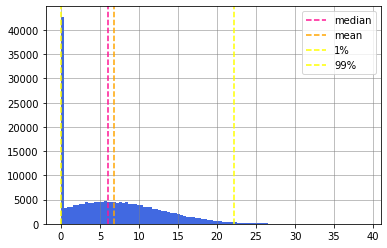

In [17]:
explorer.histogram(calls.duration, 100, 0, 39, True)

Построим график распределения с KDE (Kernel Density Estimation)

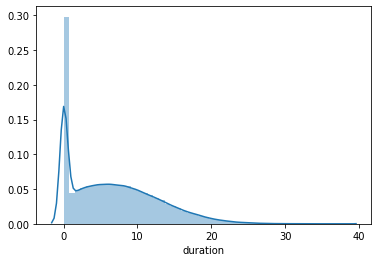

In [18]:
sns.distplot(calls.duration)

Пик у нуля. Посчитаем сколько в столбце с продолжительностью содержится нулевых значений.

In [19]:
calls.query('duration == 0').pivot_table(index = 'duration', values = 'user_id', aggfunc = 'count')

,user_id
duration,
0.0,39613


&#9889; <b>Вывод:</b> в таблице 202 607 строк, есть проблемы с данными, технические пропуски: 39 613 (20%) значений равных 0, в таблице есть неинформативный столбец 'id'.

## - **messages**

In [20]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
messages.sample(5)

,id,message_date,user_id
111626,1452_15,2018-08-02,1452
76621,1324_304,2018-06-11,1324
8082,1032_253,2018-08-11,1032
104738,1424_591,2018-12-04,1424
54791,1243_489,2018-08-21,1243


In [22]:
messages.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


In [23]:
messages.describe(include=['object']).T

,count,unique,top,freq
id,123036,123036,1100_255,1
message_date,123036,364,2018-12-31,859


In [24]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [25]:
messages.duplicated().value_counts()

False    123036
dtype: int64

<p>&#9889; <b>Вывод:</b></p> 

    1) в таблице 123 036 строк,
    2) создадим столбец message: он будет содержать число 1, означающее отправку сообщения,
    3) пропуски, которые возникнут при объединении таблиц заменим на 0 - нет сообщения. 

## - **internet**

In [26]:
internet.head(5)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [27]:
internet.sample(5)

,id,mb_used,session_date,user_id
15226,1054_206,765.49,2018-10-09,1054
13999,1048_67,135.24,2018-08-30,1048
55052,1185_174,544.85,2018-09-21,1185
57284,1191_80,0.00,2018-09-07,1191
80506,1271_63,864.63,2018-09-25,1271


In [28]:
internet.describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


In [29]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [30]:
internet.duplicated().value_counts()

False    149396
dtype: int64

Построим гистограмму для расхода трафика с базовой статистикой

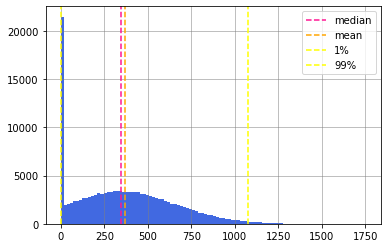

In [31]:
explorer.histogram(internet.mb_used, 100, 0, 1750, True)

Построим график распределения с KDE (Kernel Density Estimation)

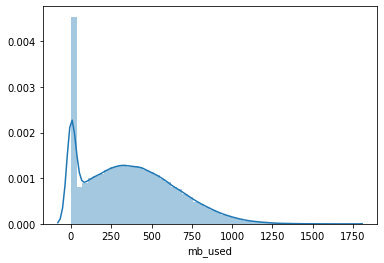

In [32]:
sns.distplot(internet.mb_used)

Пик у нуля. Посчитаем сколько в столбце с расходм трафика содержится нулевых значений.

In [33]:
internet.query('mb_used == 0').pivot_table(index = 'mb_used', values = 'user_id', aggfunc = 'count')

,user_id
mb_used,
0.0,19598


&#9889; <b>Вывод:</b> в таблице 149 396 строк, в 19 598 (13%) строках значение равно 0. В таблице есть неинформативный столбец 'id'.
</div>

## - **tariffs**

In [34]:
tariffs.head(5)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<p>&#9889; <b>Вывод:</b> таблица-словарь из двух строк, без проблем, пропусков и странных значений (ну, кроме лимитированного интернет-трафика в 2018 году за 550 рублей).</p>

## Вывод

1. В проекте пять файлов с таблицами, все в формате csv:

   1) users - информация о пользователях:
    - в таблице 500 строк,
    - нет больших проблем с данными: пропуски в churn_date, очевидно, означают действующий договор - это легко заполнить,
    - странных значений, похоже, нет,
    - есть строковые данные - ФИО - на их основе создадим столбец с полом пользователей

   2) calls - информация о звонках:
    - в таблице 202 607 строк,
    - есть проблемы с данными, технические пропуски: 39 613 значений равных 0.
    - в таблице есть неинформативный столбец 'id'.

   3) messages - информация о сообщениях:
    - в таблице 123 036 строк,
    - создадим столбец message: он будет содержать число 1, означающее отправку сообщения,
    - пропуски, которые возникнут при объединении таблиц заменим на 0 - нет сообщения. 

   4) internet - информация об интернет-сессиях:
    - в таблице 149 396 строк,
    - есть проблемы с данными, технические пропуски: 19 598 значений равных 0,
    - в таблице есть неинформативный столбец 'id'.

   5) tariffs - информация о тарифах:
    - таблица-словарь из двух строк, без проблем, пропусков и странных значений.
    
    
2. Нулевые значения - 39 613 ячеек в таблице со звонками и 19 598 значений в таблице с интернет-трафиком необходимо заполнить до объединения.

3. Столбец id в котором зафикисрован конкретный звонок, сообщение и выход в интернет - неинформативный. Кандидат на удаление во всех случаях.

4. В датесете нет дубликатов.

5. Общее впечатление от данных скорее положительное. Нет больших проблем, все решаемо без существенных потерь.

# II. Предобработка данных <a class="anchor" id="3"></a>

## - создадим столбец 'message' в таблице messages со значением 1

Поскольку в таблице с сообщениями одна запись означает одно сообщение - создадим столбец в котором будет содержаться 1, а после объединения еще или 0:

In [35]:
messages['message'] = 1

In [36]:
messages.head()

,id,message_date,user_id,message
0,1000_0,2018-06-27,1000,1
1,1000_1,2018-10-08,1000,1
2,1000_2,2018-08-04,1000,1
3,1000_3,2018-06-16,1000,1
4,1000_4,2018-12-05,1000,1


## - 0 в столбце duration из таблицы calls

Проблема с нулем неоднозначна. Варианты замены очевидны - среднее, медиана или мода. Но они создадут выбросы, которые будут выглядить странно. Выведем еще раз общее описание значений в таблице.

In [37]:
calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


Среднее - 6.75, медиана - 6, 25 процентиль - 1.3., 75 процентиль - 10.7. Выберем три случайных пользователя, чтобы посмотреть насколько эти статистики близки применительно к конкретному пользователю и как будут выглядить цифры если заполнять по среднему, моде или медиане. 

Сделаем срез без нулевых значений и посмотрим на значения среднего и медианы с помощью метода в describe()

In [38]:
calls.query('duration != 0').describe().T

,count,mean,std,min,25%,50%,75%,max
duration,162994.0,8.397794,5.353022,0.01,4.17,7.74,11.85,38.0
user_id,162994.0,1254.149877,144.751050,1000.00,1126.00,1261.00,1379.00,1499.0


**- проверим гипотезу: среднее время звонков в датасете без нулевых значений и среднее время звонков выборке без исключений нулевых значений различаются.**

In [39]:
calls_with_zeroes = calls.copy()

In [40]:
calls_without_zeroes = calls.query('duration != 0')

Сформулируем нулевую гипотезу

1) Нулевую гипотезу, которую проверяет тест, сформулируем так: "Среднее время звонков в датасете без нулевых значений и среднее время звонков выборке без исключений нулевых значений одинаково".

2) Альтернативную гипотезу, соответственно, сформулируем так: "Среднее время звонков в датасете без нулевых значений и среднее время звонков выборке без исключений нулевых значений различаются.".

Примем уровень значимости в 5%.

In [41]:
alpha = 0.05

In [42]:
tstatistic, pval = ttest_ind(calls_without_zeroes.duration, calls_with_zeroes.duration, equal_var = False)
pval

0.0

Сравним p-значение и уровень значимости

In [43]:
pval < alpha

True

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Среднее время звонков в датасете без нулевых значений и среднее время звонков выборке без исключений нулевых значений различаются. **Как следствие - заменим нулевые значения на среднее**.

In [44]:
calls.loc[(calls['duration'] == 0), 'duration'] = calls.groupby('user_id')['duration'].transform('mean')

In [45]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [46]:
calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,8.073585,4.847755,0.01,5.04,6.895622,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.00,1126.00,1260.000000,1379.0,1499.0


## - 0 в столбце mb_used из таблицы internet

В столбце 19 598 нулевых значений. Выведем еще раз общую информацию о таблице.

In [47]:
internet.describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


Сделаем срез без нулевых значений и посмотрим на значения среднего и медианы с помощью метода в describe()

In [48]:
internet.query('mb_used != 0').describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,129798.0,426.087210,255.596447,0.03,227.46,400.54,592.9475,1724.83
user_id,129798.0,1253.046318,143.782672,1000.00,1132.00,1252.00,1380.0000,1499.00


**- проверим гипотезу: средний расход трафика в датасете без нулевых значений и средний расход трафика в выборке без исключений нулевых значений различаются.**

In [49]:
internet_without_zeroes = internet.query('mb_used != 0')
internet_with_zeroes = internet.copy()

Сформулируем нулевую гипотезу


1) Нулевую гипотезу, которую проверяет тест, сформулируем так: "Средний расход трафика в датасете без нулевых значений и средний расход трафика в выборке без исключений нулевых значений одинаковы".

2) Альтернативную гипотезу, соответственно, сформулируем так: "Cредний расход трафика в датасете без нулевых значений и средний расход трафика в выборке без исключений нулевых значений различаются".

Примем уровень значимости в 5%.

In [50]:
alpha = 0.05

In [51]:
tstatistic, pval = ttest_ind(internet_with_zeroes.mb_used, internet_without_zeroes.mb_used, equal_var = False)
pval

0.0

Сравним p-значение и уровень значимости

In [52]:
pval < alpha

True

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Cредний расход трафика в датасете без нулевых значений и средний расход трафика в выборке без исключений нулевых значений различаются. **Как следствие - заменим нулевые значения на среднее**.

In [53]:
internet.loc[(internet['mb_used'] == 0), 'mb_used'] = internet.groupby('user_id')['mb_used'].transform('mean')

## - создадим столбец churn на основе churn_date из таблицы users

1) создадим столбец churn в котором будет содержаться булево True / False

In [54]:
users.loc[(users['churn_date'].isna()), 'churn'] = False
users.churn.where(users.churn == False, True, inplace = True)

In [55]:
explorer.pandahug(users.groupby('churn').user_id.count())

,user_id
churn,
False,462
True,38


Выведем на экран пример полученной таблицы

In [56]:
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,churn
204,1204,18,NaN,Москва,Мирослава,Лазарева,2018-01-04,smart,False
432,1432,48,NaN,Улан-Удэ,Анвар,Кочетков,2018-08-04,smart,False
252,1252,49,NaN,Ростов-на-Дону,Лейла,Ерофеева,2018-12-02,smart,False
157,1157,27,NaN,Москва,Виктория,Белоусова,2018-02-23,smart,False
309,1309,28,NaN,Казань,Юлия,Касьянова,2018-10-05,ultra,False
57,1057,43,NaN,Москва,Динара,Дьячкова,2018-03-12,ultra,False
311,1311,33,NaN,Тверь,Лолита,Крылова,2018-08-03,smart,False
336,1336,27,NaN,Уфа,Авксентий,Алексеичев,2018-12-31,ultra,False
227,1227,66,NaN,Санкт-Петербург,Раиса,Калинина,2018-01-09,smart,False
310,1310,28,NaN,Уфа,Рудольф,Нестеров,2018-03-22,ultra,False


## - создадим столбец sex на основе имени и фамили из таблицы users

Напишем функцию, которая по последним буквам в имени и фамилии будет возвращать "0" для женщин и "1" для мужчин

In [57]:
def sex_pointer(row):
    first_name = row['first_name']
    last_name = row['last_name']
    
    if last_name.endswith('а') or first_name.endswith('а'):
        return 'f'
    else:
        return 'm'

Применим функцию к датасету

In [58]:
users['sex'] = users.apply(sex_pointer, axis = 1)

Выведем пример полученной таблицы

In [59]:
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,churn,sex
80,1080,28,NaN,Москва,Всеволод,Игнатьев,2018-08-12,ultra,False,m
32,1032,31,NaN,Ульяновск,Инна,Игнатьева,2018-01-04,smart,False,f
443,1443,21,NaN,Казань,Иван,Афинин,2018-09-17,smart,False,m
478,1478,75,NaN,Грозный,Таира,Константинова,2018-07-16,smart,False,f
316,1316,42,NaN,Улан-Удэ,Аурелия,Алымова,2018-11-29,smart,False,f
113,1113,52,NaN,Чита,Харитон,Булгаков,2018-01-24,smart,False,m
429,1429,54,NaN,Санкт-Петербург,Джулия,Белякова,2018-01-26,smart,False,f
160,1160,73,NaN,Ульяновск,Борис,Авдонюшкин,2018-07-03,smart,False,m
161,1161,65,2018-11-07,Набережные Челны,Татьяна,Голованова,2018-07-03,smart,True,f
425,1425,51,NaN,Пермь,Вадим,Фомин,2018-02-27,smart,False,m


## - переименуем столбы с датами в таблицах, а также имя столбца с тарифами в таблице tariffs

In [60]:
messages.columns = ['id', 'date', 'user_id', 'message']

In [61]:
calls.columns = ['id', 'date', 'duration', 'user_id']

In [62]:
internet.columns = ['id', 'mb_used', 'date', 'user_id']

In [63]:
tariffs.rename(columns = {'tariff_name': 'tariff'}, inplace = True)

In [64]:
tariffs['tariff_placeholer'] = tariffs.tariff.map({'smart':0, 'ultra':1})

## - конвертируем столбцы с датами

In [65]:
calls['date'] = pd.to_datetime(calls['date'], format='%Y-%m-%d')

In [66]:
internet['date'] = pd.to_datetime(internet['date'], format='%Y-%m-%d')

In [67]:
messages['date'] = pd.to_datetime(messages['date'], format='%Y-%m-%d')

## - создадим столбец с месяцем и днем</font>

Столбец с месяцами

In [68]:
calls['month'] = calls.date.dt.month

In [69]:
internet['month'] = internet.date.dt.month

In [70]:
messages['month'] = messages.date.dt.month

## - избавимся от  идентификатора звонка, сообщения и интернет-сессии

<p>&#9889; <b> Прежде чем избавиться от идентификатора звонка, сообщения и интернет-сессии посчитаем и сохраним число звоноков для каждого пользователя в месяц и сохраним в переменную calls_per_month_for_user

In [71]:
calls_per_month_for_user = calls.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')

С помощью метода drop избавимся от столбцов

In [72]:
calls.drop('id', axis = 1, inplace = True)
internet.drop('id', axis = 1, inplace = True)
messages.drop('id', axis = 1, inplace = True)

## Вывод

1. Нули заменены на среднее значение: 39 613 из 202 607 значений в столбце duration из таблицы calls (20%) и 19 598 из 149 396 значений в столбце mb_used из таблицы internet (13%).
   
2. На основе столбца churn_date из таблицы users создан столбец churn c булевым True (38) / False (462).

3. Были отброшены как неинформативные значения идентификаторы звонка (202 607), сообщения (123 036) и интернет-сессии (149 396) - во всех случая методом drop() удален столбец id.

4. Для целей будущего объединения переименованы и конвертировны столбцы с датами в таблицах, а также созданы столбцы с месяцами (202 607, 123 036, 149 396).

5. В таблице messages создан столбец 'message' со значением 1: это облегчит объединение, заполнение NaN после объединения и последующие подсчеты при анализе данных.

6. В таблице users создан столбец 'sex' со значением 'm' для мужчин и 'f' для женщин: женщин 256 (51%), а мужчин 244 (49%) из 500 (100%) пользователей

# III. Объединие и дополнение таблиц <a class="anchor" id="4"></a>

## - используем метод join

Поскольку нас интересуют данные за каждый месяц - перед объединением сделаем сводные таблицы для звонков, сообщений и интернет-трафика

In [73]:
internet_pivot = internet.pivot_table(index = ['user_id', 'month'], aggfunc = 'sum')

In [74]:
calls_pivot = calls.pivot_table(index = ['user_id', 'month'], aggfunc = 'sum')

In [75]:
messages_pivot = messages.pivot_table(index = ['user_id', 'month'], aggfunc = 'sum')

Теперь можем объеденить полученные таблицы в один датасет

In [76]:
df_temp = calls_pivot.join(internet_pivot, how = 'outer')

In [77]:
df = df_temp.join(messages_pivot, how = 'outer')

Выведем общую информацию о полученной таблице

In [78]:
df.head(5)

duration       mb_used  message
user_id month                                   
1000    5      182.916522   2762.458294     22.0
        6      257.469565  25778.611469     60.0
        7      358.227826  14512.608294     75.0
        8      455.583043  15073.866588     81.0
        9      518.995652  15586.846588     57.0

In [79]:
df.sample(5)

,,duration,mb_used,message
user_id,month,,,
1412,11,728.865856,42188.390064,52.0
1193,10,521.283194,11943.730588,29.0
1161,10,360.691979,25020.024310,34.0
1007,7,633.176078,19262.842740,26.0
1091,7,NaN,16971.474902,35.0


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,3174.0,515.363856,265.875174,0.100000,327.768570,502.723785,665.489744,1920.706419
mb_used,3203.0,19343.044761,8008.606065,320.050178,14396.958989,19350.251715,24073.908634,51854.792101
message,2717.0,45.283769,35.051363,1.000000,19.000000,38.000000,63.000000,224.000000


In [81]:
df.isna().any()

duration    True
mb_used     True
message     True
dtype: bool

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 3 columns):
duration    3174 non-null float64
mb_used     3203 non-null float64
message     2717 non-null float64
dtypes: float64(3)
memory usage: 88.9 KB


<p>&#9889; <b>Вывод:</b></p>

В результате объединения была получена сводная таблица в 3214 строк с логичными пропусками в столбцах duration (40), mb_used (11), message (497‬).

## - заполним образовавшиеся в результате объединения пропуски

Заполним пропуски плейсхолдером - 0, который означает, что в конкретном месяце пользователь не использовал данный вид связи.

In [83]:
df.message.fillna(0, inplace = True)
df.mb_used.fillna(0, inplace = True)
df.duration.fillna(0, inplace = True)

In [84]:
df.isna().any()

duration    False
mb_used     False
message     False
dtype: bool

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 3 columns):
duration    3214 non-null float64
mb_used     3214 non-null float64
message     3214 non-null float64
dtypes: float64(3)
memory usage: 88.9 KB


Сбросим индекс, чтобы избавиться от мультиндекса

In [86]:
df.reset_index(inplace = True)

## - конвертируем данные

1) продолжительность звонка и количество мегабайт к целочисленному типу - потому что и звонки, и интернет тарифицируется с округлением в большую сторону.

2) сообщения к целочисленному типу - невозможно отправить половину смс.


In [87]:
try:
    df['duration'] = df.duration.astype(np.int)
    df['mb_used'] = df.mb_used.astype(np.int)
    df['message'] = df.message.astype(np.int)
except:
    print("Ошибка!")
finally:
    print('Конвертация прошла успешно.')

Конвертация прошла успешно.


In [88]:
df.sample(5)

,user_id,month,duration,mb_used,message
1801,1284,8,578,16592,44
793,1123,8,820,21809,16
2679,1417,12,460,14614,92
714,1113,2,610,10456,39
1393,1218,12,452,13536,16


## - присоединим к датасету таблицу users

Используем метод .merge()

In [89]:
df = pd.merge(df, users)

Выведем полученную таблицу

In [90]:
df.sample(5)

,user_id,month,duration,mb_used,message,age,churn_date,city,first_name,last_name,reg_date,tariff,churn,sex
2017,1318,9,743,9535,56,53,NaN,Курган,Марьяна,Анищенко,2018-03-22,ultra,False,f
601,1096,4,436,14570,73,60,NaN,Брянск,Мариетта,Абашкина,2018-04-01,ultra,False,f
2826,1437,10,350,20606,14,73,NaN,Казань,Лилия,Селезнева,2018-08-03,smart,False,f
857,1135,1,85,1927,1,64,NaN,Архангельск,Милена,Воронина,2018-01-29,smart,False,f
928,1147,8,257,23089,36,63,NaN,Якутск,Владимир,Синицын,2018-07-09,smart,False,m


## - дополним таблицу выручкой от каждого клиента

Соберем методом merge основной датасет df и словарь tariff в технический датасет df_calculations

In [91]:
df_calculations = pd.merge(df, tariffs)

Выведем таблицу на экран

In [92]:
df_calculations.head(5)

,user_id,month,duration,mb_used,message,age,churn_date,city,first_name,last_name,reg_date,tariff,churn,sex,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_placeholer
0,1000,5,182,2762,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,m,1000,30720,3000,1950,150,1,1,1
1,1000,6,257,25778,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,m,1000,30720,3000,1950,150,1,1,1
2,1000,7,358,14512,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,m,1000,30720,3000,1950,150,1,1,1
3,1000,8,455,15073,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,m,1000,30720,3000,1950,150,1,1,1
4,1000,9,518,15586,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,m,1000,30720,3000,1950,150,1,1,1


Посчитаем перерасход для каждого из клиентов с помощью метода .eval()

In [93]:
df_calculations.eval('package_int = mg_per_month_included - mb_used', inplace = True)
df_calculations.eval('package_calls = minutes_included - duration', inplace = True)
df_calculations.eval('package_message = messages_included - message', inplace = True)

Для расчета выручки от перерасхода создадим функции, которые принимают строку, выбирают нужный столбец и, в зависимости от тарифа, делает расчет по звонкам, интернету и сообщениям.

- функция для интернета

In [94]:
def internet_overspender_calc(row):
    internet = row['package_int']
    tariff = row['tariff']
    price = row['rub_per_gb']
    
    if internet < 0 and tariff == 'ultra':
        return abs(internet/1000*price)
    elif internet < 0 and tariff == 'smart':
        return abs(internet/1000*price)
    else:
        return 0

- функция для звонков

In [95]:
def calls_overspender_calc(row):
    calls = row['package_calls']
    tariff = row['tariff']
    price = row['rub_per_minute']
        
    if calls < 0 and tariff == 'ultra':
        return abs(calls)
    elif calls < 0 and tariff == 'smart':
        return abs(calls*price)
    else:
        return 0

- функция для сообщений

In [96]:
def messages_overspender_calc(row):
    message = row['package_message']
    tariff = row['tariff']
    price = row['rub_per_message']
    
    if message < 0 and tariff == 'ultra':
        return abs(message)
    elif message < 0 and tariff == 'smart':
        return abs(message*price)
    else:
        return 0

Теперь с помощью метода apply создадим и заполним столбцы с суммами переплаты

In [97]:
df_calculations['fee_internet'] = df_calculations.apply(internet_overspender_calc, axis = 1)
df_calculations['fee_messages'] = df_calculations.apply(messages_overspender_calc, axis = 1)
df_calculations['fee_calls'] = df_calculations.apply(calls_overspender_calc, axis = 1)

Теперь создадим столбец с общей месячной платой для каждого пользователя

In [98]:
df_calculations.eval('total_monthly_fee = fee_calls + fee_messages + fee_internet + rub_monthly_fee', inplace = True)

Выведем полученную таблицу

In [99]:
df_calculations.sample(5)

,user_id,month,duration,mb_used,message,age,churn_date,city,first_name,last_name,reg_date,tariff,churn,sex,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_placeholer,package_int,package_calls,package_message,fee_internet,fee_messages,fee_calls,total_monthly_fee
2439,1319,9,859,22629,60,70,NaN,Санкт-Петербург,Харитон,Парфенов,2018-08-24,smart,False,m,50,15360,500,550,200,3,3,0,-7269,-359,-10,1453.8,30,1077,3110.8
767,1385,9,449,36218,113,26,NaN,Москва,Алиса,Дубинина,2018-01-13,ultra,False,f,1000,30720,3000,1950,150,1,1,1,-5498,2551,887,824.7,0,0,2774.7
705,1375,5,1072,20799,79,53,NaN,Пенза,Мария,Акимычева,2018-01-04,ultra,False,f,1000,30720,3000,1950,150,1,1,1,9921,1928,921,0.0,0,0,1950.0
2520,1338,8,182,19377,23,64,NaN,Москва,Павел,Орлов,2018-05-11,smart,False,m,50,15360,500,550,200,3,3,0,-4017,318,27,803.4,0,0,1353.4
2988,1451,9,967,11935,56,58,NaN,Набережные Челны,Виктория,Завьялова,2018-08-27,smart,False,f,50,15360,500,550,200,3,3,0,3425,-467,-6,0.0,18,1401,1969.0


**Соберем датасет в отношении которого будем проводить анализ**

In [100]:
df_master = df_calculations[['user_id', 'month', 'duration', 'mb_used', 'message', 'age', 'sex', 'city', 'churn',
                             'rub_monthly_fee', 'fee_internet', 
                             'fee_messages', 'fee_calls', 'total_monthly_fee', 'tariff']]

In [101]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
user_id              3214 non-null int64
month                3214 non-null int64
duration             3214 non-null int32
mb_used              3214 non-null int32
message              3214 non-null int32
age                  3214 non-null int64
sex                  3214 non-null object
city                 3214 non-null object
churn                3214 non-null object
rub_monthly_fee      3214 non-null int64
fee_internet         3214 non-null float64
fee_messages         3214 non-null int64
fee_calls            3214 non-null int64
total_monthly_fee    3214 non-null float64
tariff               3214 non-null object
dtypes: float64(2), int32(3), int64(6), object(4)
memory usage: 364.1+ KB


In [102]:
df_master.sample(5)

,user_id,month,duration,mb_used,message,age,sex,city,churn,rub_monthly_fee,fee_internet,fee_messages,fee_calls,total_monthly_fee,tariff
2444,1320,10,364,14418,26,38,m,Балашиха,False,550,0.0,0,0,550.0,smart
2745,1400,11,623,28541,63,71,m,Москва,False,550,2636.2,39,369,3594.2,smart
601,1333,12,753,21978,145,58,f,Москва,False,1950,0.0,0,0,1950.0,ultra
220,1120,8,358,8139,0,25,f,Краснодар,False,1950,0.0,0,0,1950.0,ultra
753,1382,7,632,8320,75,42,f,Самара,False,1950,0.0,0,0,1950.0,ultra


In [103]:
df_master.query('churn == 1').tariff.value_counts()

smart    111
ultra     76
Name: tariff, dtype: int64

## Вывод

1. Методом join были объединены таблицы calls, messages и internet.

2. В результате объединения была получена сводная таблица в 3214 строк с логичными пропусками в столбцах duration (40), mb_used (11), message (497‬).

3. Пропуски были заполнены плейсхолдером - 0, который означает, что в конкретном месяце пользователь не использовал данный вид связи: 40 нулей для звонков, 11 для интернета и 497 для сообщений.

4. С помощью reset_index - избавились от мультиндекса в таблице.

5. Продолжительность звонка, количество использованных мегабайт были конвертированы в целочисленный тип - потому что и звонки, и интернет тарифицируется с округлением в большую сторону. Сообщения были конвертированы в целочисленный тип - невозможно отправить половину смс.

6. Таблица была дополнена столбцом с тарифом для каждого пользователя на основе данных из датасета users.

7. Были рассчитаны для каждго пользователя расход минут, интернета и собщения сверх пакетов услуг по тарифу, расчитана доплата по каждому виду связи и посчитана итоговая плата за месяц для пользователя.

8. Итогом объединения и заполнения таблиц стал датасет df_master в котором расчитана для каждого пользователя:
    - количество израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячная выручка с каждого пользователя;
    - определен пол,
    - указан город пользователя,
    - заполнен индикатор расторжения договора.
    

# IV. Анализ данных <a class="anchor" id="5"></a>

## - проверим корреляцию в датасете</font>

In [104]:
df_master.corr().style.apply(explorer.highlight_max)

,user_id,month,duration,mb_used,message,age,rub_monthly_fee,fee_internet,fee_messages,fee_calls,total_monthly_fee
user_id,1,-0.0164995,0.0276906,0.0400964,0.039538,-0.0239107,0.0528738,-0.0357061,0.0218373,0.0254979,0.0107229
month,-0.0164995,1,0.16531,0.193907,0.114815,-0.0169886,-0.0152405,0.155675,0.0656865,0.127853,0.183329
duration,0.0276906,0.16531,1,0.269888,0.175498,0.0847143,0.206149,0.0621097,0.0434303,0.446811,0.346148
mb_used,0.0400964,0.193907,0.269888,1,0.174507,-0.0105566,0.0906642,0.636332,0.0383627,0.106282,0.71223
message,0.039538,0.114815,0.175498,0.174507,1,-0.00817384,0.20383,-0.0402496,0.470622,0.0142002,0.122603
age,-0.0239107,-0.0169886,0.0847143,-0.0105566,-0.00817384,1,0.00773446,-0.0386616,0.0256925,0.0525271,-0.0142535
rub_monthly_fee,0.0528738,-0.0152405,0.206149,0.0906642,0.20383,0.00773446,1,-0.405561,-0.232371,-0.325917,0.180493
fee_internet,-0.0357061,0.155675,0.0621097,0.636332,-0.0402496,-0.0386616,-0.405561,1,0.151194,0.274811,0.78163
fee_messages,0.0218373,0.0656865,0.0434303,0.0383627,0.470622,0.0256925,-0.232371,0.151194,1,0.176426,0.0800343
fee_calls,0.0254979,0.127853,0.446811,0.106282,0.0142002,0.0525271,-0.325917,0.274811,0.176426,1,0.369282


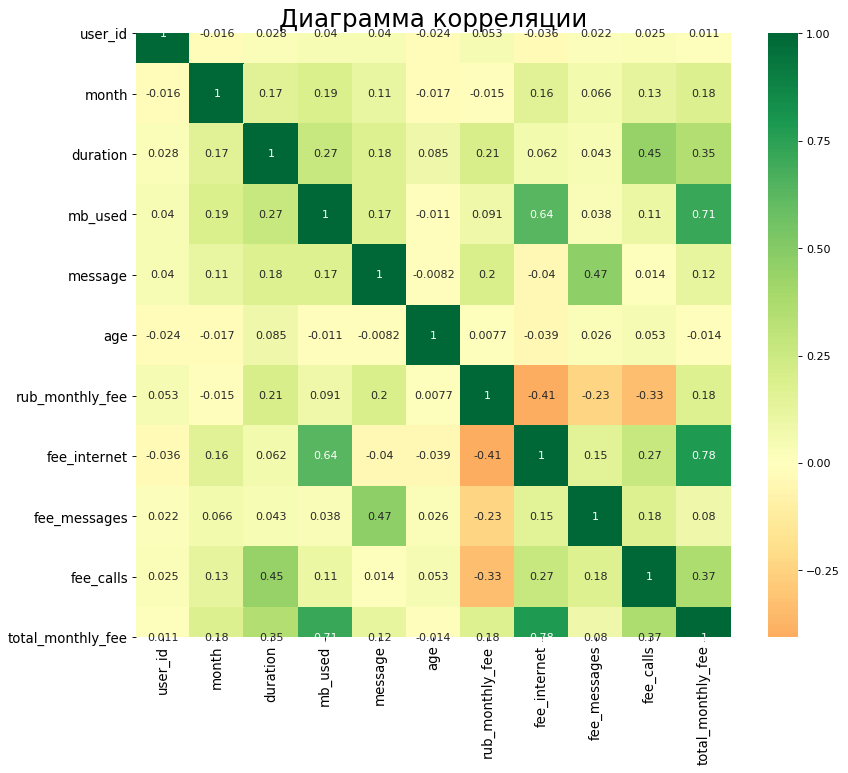

In [105]:
explorer.corr_diagram(df_master)

<p>&#9889; <b>Вывод:</b></p> продолжительность звонков, количество смс и использование интернета демонстирует сильную положительную корреляция между собой. Чем больше человек пользуется одним видом связи, тем больше он пользуется и другим. Кроме того, сильная корреляция с месяцем - исследуем позже. В целом, каких-то существенных выводов, полезных для целей исследования из корреляции не сделать.

## - проверим датасет на выбросы в значениях

**Построим общую диаграмму ящик с усами для расхода минут, интернета и сообщений**

In [106]:
df_master_features = df_master[['duration', 'mb_used', 'message']]

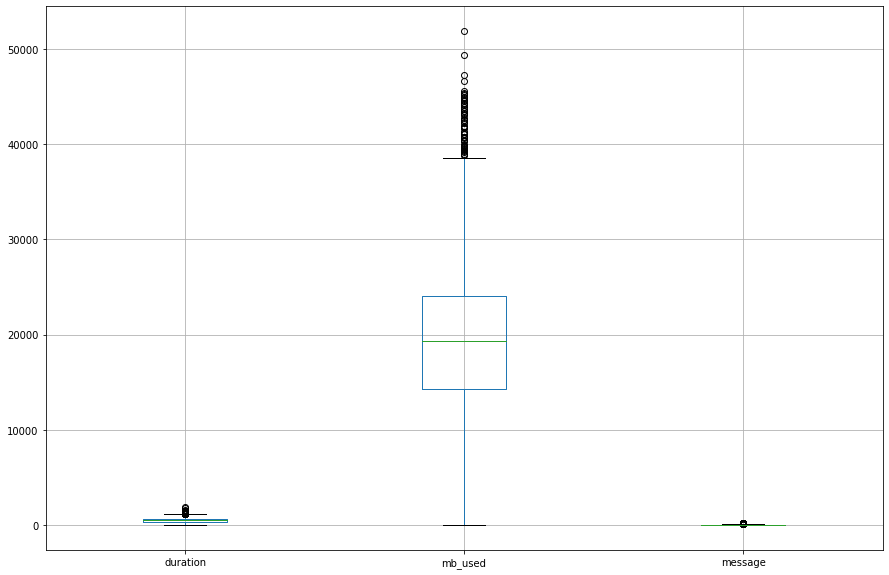

In [107]:
df_master_features.boxplot(figsize=(15,10))

**Отдельно для звонков**

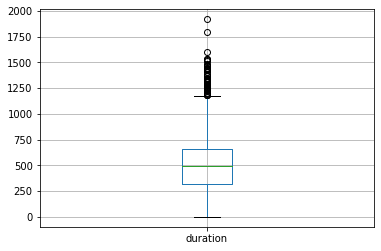

In [108]:
df_master.boxplot('duration')

Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 1240 минут — это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Более высокие значения сливаются в единую линию: выбросов много. Но медиана на месте.

**Отдельно для трафика**

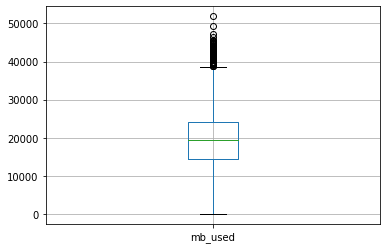

In [109]:
df_master.boxplot('mb_used')

Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 40000 МБ. Более высокие значения сливаются в единую жирную линию: выбросов очень много, но как в случае со звонками - влияние на медиану незначительное.

**Отдельно для сообщений**

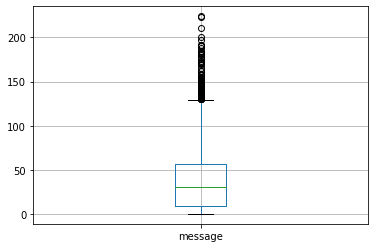

In [110]:
df_master.boxplot('message')

<p>&#9889; <b>Вывод:</b> на общей диаграмее видно, что во всех случаях есть выбросы. <b>Выбросы будут сохранены намеренно, поскольку они должны сыграть важную роль в анализе. В данном случае выбросы не искажают выборку, а играют важную роль в сути явления, в понимании поведения пользователей и, в конечном счете, от выбросов зависит окончательное принятие решения о том, какой тариф приносит больше выручки. Более того,  судя по графикам - выбросы мало влияют на медиану.</b>

## - проверим из каких городов пользователи, какой тариф популярнее и узнаем средний возраст клиента</font>

Построим столбчатый график для городов

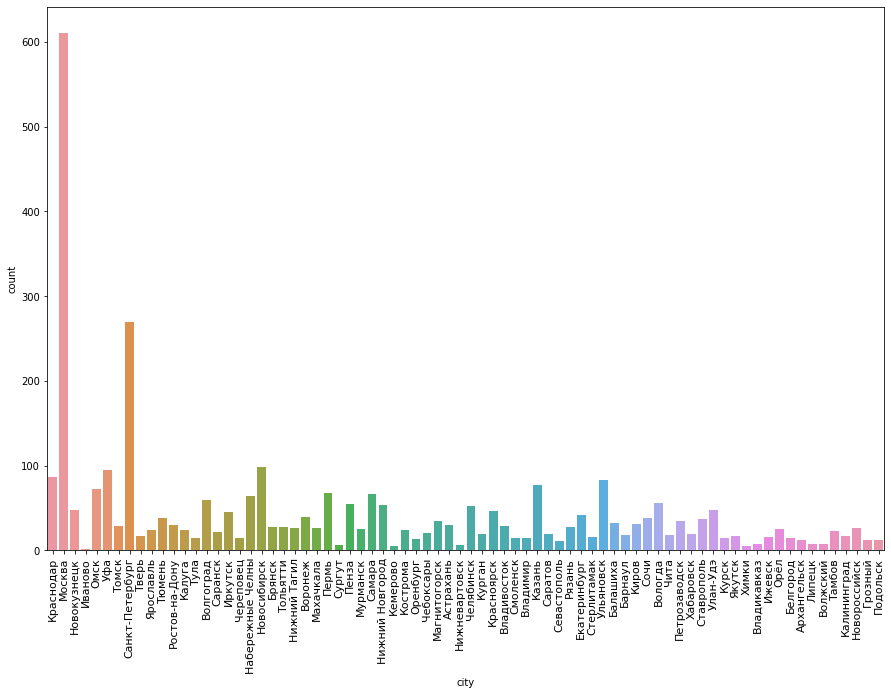

In [111]:
explorer.categorical_counter_plot(df_master, 'city', 15, 10)

Построим столбчатый график для тарифов

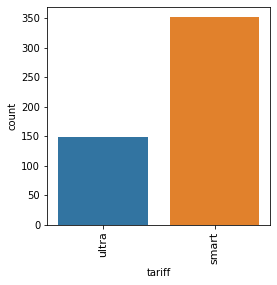

In [112]:
explorer.categorical_counter_plot(users, 'tariff', 4, 4)

Построим гистограмму для возрастов с средним, медианой 1 и 99 процентилем.

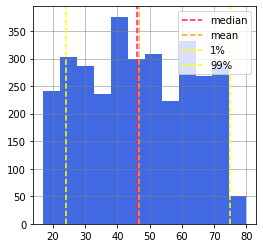

In [113]:
explorer.histogram(df_master.age, 12, 17, 80, True)

In [114]:
explorer.pandahug(df_master.describe().age)

,age
count,3214.000000
mean,46.641568
std,16.586109
min,18.000000
25%,32.000000
50%,46.000000
75%,62.000000
max,75.000000


In [115]:
users.describe(include = ['object']).T

,count,unique,top,freq
churn_date,38,33,2018-12-21,2
city,500,76,Москва,99
first_name,500,246,Радим,6
last_name,500,419,Андреенко,5
reg_date,500,270,2018-05-28,8
tariff,500,2,smart,351
churn,500,2,False,462
sex,500,2,f,256


&#9889; **Вывод:**
    <ol>1) cредний возраст клиента (почти совпадает с медианой) - 46 лет,</ol>
    <ol>2) тариф "Смарт" - популярнее: его выбрали 63 % (351 из 500) пользователей,</ol>
    <ol>3) двадцать процентов пользователей из Москвы (99 / 500).</ol>

## - проверим изменения расхода минут, интернета и сообщений по месяцам

In [116]:
monthly_use_internet = explorer.pandahug(internet.groupby('month').mb_used.mean())
monthly_use_calls = explorer.pandahug(calls.groupby('month').duration.mean())
monthly_use_messages = explorer.pandahug(messages.groupby('month').message.count())

In [117]:
Display('monthly_use_internet', 'monthly_use_calls', 'monthly_use_messages')

,mb_used
month,
1,410.434713
2,410.371056
3,414.286453
4,416.805508
5,418.640311
6,421.426537
7,415.628089
8,416.778345
9,412.990282


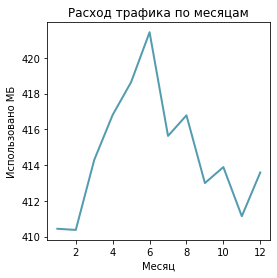

In [118]:
explorer.lineplot(monthly_use_internet.index, monthly_use_internet.values, 'Месяц', 'Использовано МБ', 'Расход трафика по месяцам')

Расход интернета колеблется в пределах 3 %. Начиная с января расход быстро растет до апреля, затем уже медленнее достигает пика в июне, а потом снижается до конца года, снижаясь несколькими рывками, пока не начинает снова расти к декабрю.

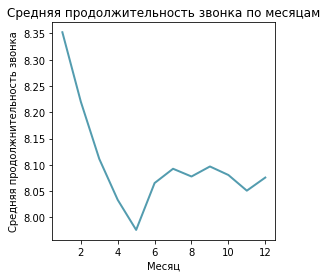

In [119]:
explorer.lineplot(monthly_use_calls.index, monthly_use_calls.values, 'Месяц', 'Средняя продолжнительность звонка', 'Средняя продолжительность звонка по месяцам')

Средняя продолжительность звонка снижается вплоть до мая, когда достигает дна. Видимо провал в мае связан со снижением деловой активности из-за длинных праздников. Затем продолжительность звонка растет до июня, отыгрывая часть потерь, но далее уже до конца года так и не достигнув пика начала года. 

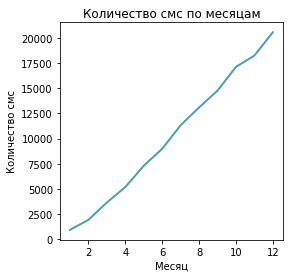

In [120]:
explorer.lineplot(monthly_use_messages.index, monthly_use_messages.values, 'Месяц', 'Количество смс', 'Количество смс по месяцам')

Неожиданый линейный рост, принимая во внимание, что смс - отмирающий вид связи. Видимо, поскольку в случае с смс мы подсчитывали количество, а не среднее или медиану - то такой рост объясняется особенностью выборки: к концу года больше пользователей, а значит и больше смс. <a class="anchor" id="resume_about_sms"></a>

In [121]:
df_master.pivot_table(index = 'user_id', values = 'message', aggfunc = 'mean').sort_values(by = 'message', ascending = False).query('message > 40').count()

message    202
dtype: int64

In [122]:
df_master.pivot_table(index = 'user_id', values = 'message', aggfunc = 'mean').sort_values(by = 'message', ascending = False).query('message > 40').count()

message    202
dtype: int64

In [123]:
#df_master_age.pivot_table(index = 'age', values = 'message', aggfunc = 'mean').sort_values(by = 'age', ascending = False).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CFD35DA48>]],
      dtype=object)

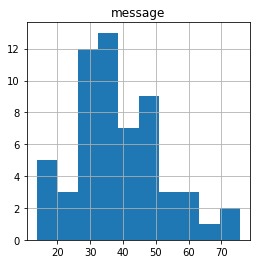

In [124]:
df_master.pivot_table(index = 'age', values = 'message', aggfunc = 'mean').sort_values(by = 'age', ascending = False).hist()

In [125]:
month_mean_sms = df_master.pivot_table(index = 'month', values = 'message', aggfunc = 'mean')

In [126]:
month_users_count = df_master.pivot_table(index = 'month', values = 'user_id', aggfunc = 'count')

In [127]:
month_total_messages_sended = df_master.pivot_table(index = 'month', values = 'message', aggfunc = 'sum')

In [128]:
Display('month_mean_sms', 'month_users_count', 'month_total_messages_sended')

,message
month,
1,21.488372
2,23.463415
3,32.000000
4,31.011976
5,35.086538
6,36.221774
7,38.767123
8,38.269006
9,39.357333


&#9889; **Вывод:** расход пакетов услуг зависит от месяца: для расхода минут и интернета драматичнее всего влияние приближающейся весны - длительность звонков сокращается, а расход интернета растет. В отношении линейного роста количества отправленных смс необходимо отметить следующее. Выборка из пятисот пользователей. Чтобы отправить 20 000 сообщений в месяц каждому нужно отправлять 40 смс в месяц. Я, например, отправляю около 0 сообщений в год. Но в представленной выборке 202 пользователя отправляю в среднем больше 40 сообщений в месяц, а это 40 %. Кроме того, около 12 процентов отправляют вдвое больше сообщений  месяц. Кажется странным, но в этом случае линейный рост удивителен только на первый взгляд: в январе - 43 пользователя, в декабря уже 476. В январе 43 пользователя отправили, в среднем, 21 смс - то есть 903‬ смс в совокупности. В июне пользователей было уже 248, а отправлял каждый из них, в среднем, 36 смс в месяц, то есть все вместе - 8 928‬ смс. В декабре, в среднем, 476 пользоателей отправляли 43 смс, что в сумме дает 20 468‬ смс. Следовательно, ранее высказанное заключение о линейной связи между увеличением общего числа смс и количеством пользователей было изначально верным</font>.

## - исследуем поведние женщин и мужчин</font>

Посчитаем число женщин и мужчин в датасете

In [129]:
users.pivot_table(index = 'sex', values = 'user_id', aggfunc = 'count')

,user_id
sex,
f,256
m,244


Женщин 256 (51%), а мужчин 244 (49%) из 500 пользователей. Визуалзируем соотношение

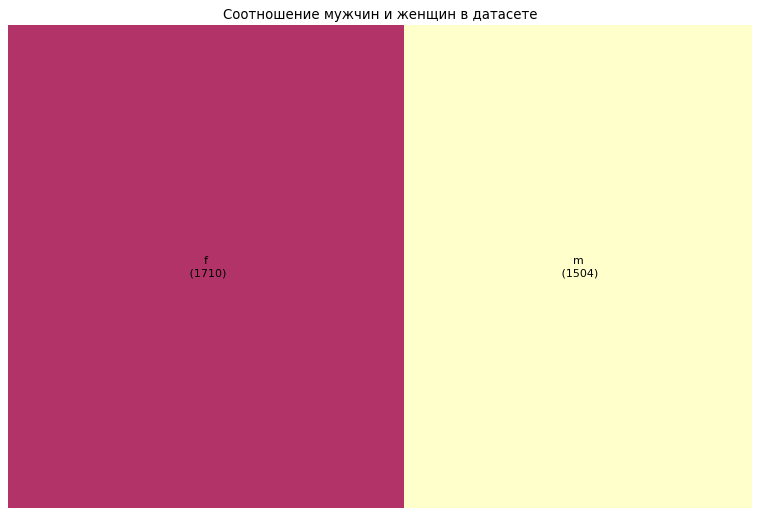

In [130]:
df = df_master.groupby('sex').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Соотношение мужчин и женщин в датасете')
plt.axis('off')
plt.show()

In [131]:
df_master.pivot_table(index = 'sex', values = ['total_monthly_fee', 'mb_used', 'duration', 'message'], aggfunc = ['mean', 'sum'])

mean                                                 sum            \
       duration       mb_used    message total_monthly_fee duration   mb_used   
sex                                                                             
f    516.867251  19419.692398  37.178363       1844.774912   883843  33207674   
m    498.875000  19113.357048  39.535239       1843.144947   750308  28746489   

                               
    message total_monthly_fee  
sex                            
f     63575         3154565.1  
m     59461         2772090.0

&#9889; **Вывод:**
    

    1) средний платежи женщин и мужчин практически идентичны (1844.77 - для женщин и 1843.14 - для мужчин),
    2) женщины немного дольше разговаривают (517 минут против 499 минут у мужчин), тратят чуть больше интернета (19420 мб против 19113 мб) и отправляют почти одинаковое количетство смс,
    3) в целом, различия не настолько существенны, чтобы проводить дополнительные тесты.
    

## - исследуем какую выручку приносил каждый из тарифов помесячно и тенденцию для каждого из тарифов, а также проверим медиану ежемесяной платы

**Перед исследованием выведем на экан соотношение количества пользователей каждого тарифа**

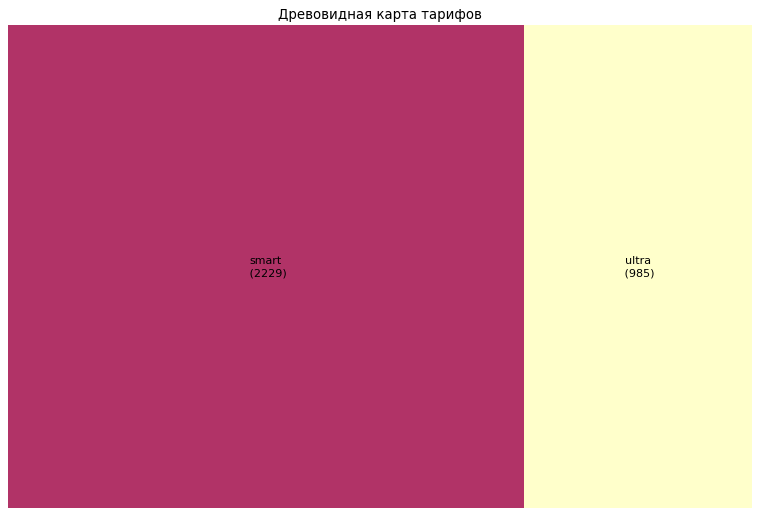

In [132]:
df = df_master.groupby('tariff').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Древовидная карта тарифов')
plt.axis('off')
plt.show()

Соотношение пользователей тарифа "Смарт" к пользователям тарифа "Ультра", грубо, два к одному.

**Соберем сводную таблицу для тарифа "Смарт" по сумме**

In [133]:
smart_fee = df_master.query('tariff == "smart"').pivot_table(index = 'month', 
                                                             values = 'total_monthly_fee', 
                                                             aggfunc = 'sum')

Соберем сводную таблицу для тарифа "Ультра" по сумме

In [134]:
ultra_fee = df_master.query('tariff == "ultra"').pivot_table(index = 'month', 
                                                             values = 'total_monthly_fee', 
                                                             aggfunc = 'sum')

Выведем обе таблицы на экран рядом друг с другом

In [135]:
Display('smart_fee', 'ultra_fee')

,total_monthly_fee
month,
1,28163.6
2,60281.6
3,117163.2
4,141079.6
5,226918.6
6,262610.4
7,330835.2
8,416571.4
9,438300.4


Нарисуем линейный график для выручки по обоим тарифам.

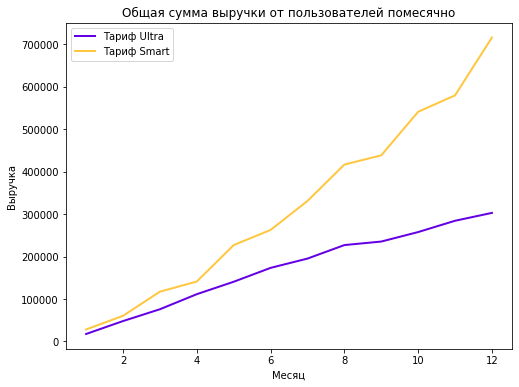

In [136]:
explorer.double_lineplot(ultra_fee.index, ultra_fee.total_monthly_fee, 
                         smart_fee.index, smart_fee.total_monthly_fee, 
                         'Месяц', 'Выручка', 'Общая сумма выручки от пользователей помесячно',
                        'Тариф Ultra', 'Тариф Smart')

Соберем сводную таблицу для тарифа "Смарт" по медианному ежемесячному платежу

In [137]:
smart_fee_median = df_master.query('tariff == "smart"').pivot_table(index = 'month', 
                                                                    values = 'total_monthly_fee', 
                                                                    aggfunc = 'median')

Соберем сводную таблицу для тарифа "Ультра" по медианному ежемесячному платежу

In [138]:
ultra_fee_median = df_master.query('tariff == "ultra"').pivot_table(index = 'month', 
                                                                             values = 'total_monthly_fee', 
                                                                             aggfunc = 'median')

Выведем обе таблицы на экран рядом друг с другом

In [139]:
Display('smart_fee_median', 'ultra_fee_median')

,total_monthly_fee
month,
1,550.0
2,713.9
3,1234.8
4,940.2
5,1478.2
6,1365.1
7,1541.0
8,1630.4
9,1510.0


Нарисуем линейный график для медианы выручки по обоим тарифам. Линия тарифа ультра будет паралельна оси абсцисс, но это нас устраивает. 

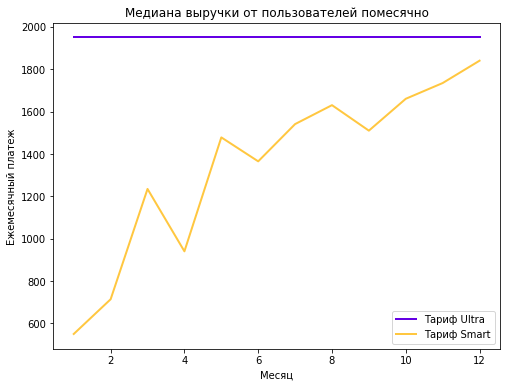

In [140]:
explorer.double_lineplot(ultra_fee_median.index, ultra_fee_median.total_monthly_fee, 
                         smart_fee_median.index, smart_fee_median.total_monthly_fee, 
                         'Месяц', 'Ежемесячный платеж', 'Медиана выручки от пользователей помесячно',
                        'Тариф Ultra', 'Тариф Smart')

Вот, тут все на своих местах - медианный платеж от пользователя тарифом "Ультра" выше, чем от пользователя тарифа "Смарт", но медианный платеж тарифа "Смарт" показывает неуклонный рост и приближается к медианному платежу пользователей тарифа "Ультра". Это хорошо.

Тариф "Ультра" со своими лимитами привлекательная и логичная замена тарифу "Смарт". Если снизить лимиты в "Ультра" - пользователи при регулярном перерасходе найдут альтернативу у другого оператора. Кроме того, в данном случае лимиты не влият на издержки оператора.

**Проверим, у скольких пользователей тарифа "Смарт" средний ежемесяный платеж втрое превышает базовую плату: сумма такого платежа приближается к сумме платежа по тарифу "Ультра". Такие пользователи очевидная цель для рекламы тарифа "Ультра".

Соберем сводную таблицу

In [141]:
df_smart_overspenders = df_master.query('tariff == "smart" and total_monthly_fee > rub_monthly_fee*3').pivot_table(index = ['user_id'], 
                                                                              values = 'total_monthly_fee',
                                                                              aggfunc = ['mean', 'count', 'sum']).reset_index()

Избавимся от мультиндекса

In [142]:
df_smart_overspenders.rename(columns = {'mean':'', 'count':'', 'sum':''})
df_smart_overspenders.columns = [t[0] if t[0] else t[1] for t in df_smart_overspenders.columns]

Переименуем столбцы

In [143]:
df_smart_overspenders.rename(columns = {'mean':'mean_fee', 'count':'times_overpaided', 'sum':'expences_on_smart'}, inplace = True)

Посчитаем для каждого пользователя тарифа "Смарт" с перерасходом полные затраты за все время действия договора, создадим столбец в котором посчитаем полные возможные расходы для данных пользователей, если бы они пользовались тарифом "Ультра", затем посчитаем разницу между фактической суммой расходов и возможной суммой расходов за тот же период на "Ультра".

In [144]:
df_smart_overspenders['expences_on_ultra'] = df_smart_overspenders['times_overpaided'] * tariffs.loc[1, 'rub_monthly_fee']

In [145]:
df_smart_overspenders['expences_difference'] =  df_smart_overspenders['expences_on_smart'] - df_smart_overspenders['expences_on_ultra']

Узнаем сколько пользователей поратило с тарифом "Смарт" на услуги больше, чем потратило бы на тарифе "Ультра" за тот же период

In [146]:
df_smart_overspenders.query('expences_difference > 0').user_id.count()

240

Двести сорок пользователей, что составляет 68 % от всех пользователей тарифом "Смарт" (240/351)

**Эти 240 пользователей (68 %) тарифа "Смарт" очень нас интересуют: их можно и нужно подтолкнуть к тарифу "Ультра", для них переход должен быть почти самоочевидным.** 

<p>&#9889; <b>Вывод:</b> 
    
    1) оба тарифа от месяца к месяцу приносят больше, но выручка по тарифу "Смарт" приносит и более высокую общую ежемесячную выручку, и демонстрирует значительно более высокий рост от месяца к месяцу,
    2) причина в том, что количество пользователей тарифом "Смарт" больше в два раза, чем количество пользователей "Ультра",
    2) медианный платеж от пользователя тарифом "Ультра" выше, чем от пользователя тарифа "Смарт", но медианный платеж тарифа "Смарт" показывает неуклонный рост и приближается к медианному платежу пользователей тарифа "Ультра",
    3) среди пользователей тарифа выделяется группа, которая переплачивает за услуги. Группа  - очевидная цель для рекламы: переход на тариф "Ультра" должен быть для таких пользователей логичным и безболезненным шагом.
    
    

## - посчитаем среднее количество, дисперсию и стандартное отклонение для каждого из тарифов

**Сделаем два среза по тарифу**

In [147]:
df_ultra = df_master.query('tariff == "ultra"')

In [148]:
df_smart = df_master.query('tariff == "smart"')

**1) Построим гистограммы, посчитаем среднее количество, дисперсию и стандартное отклонение для расхода интернета**

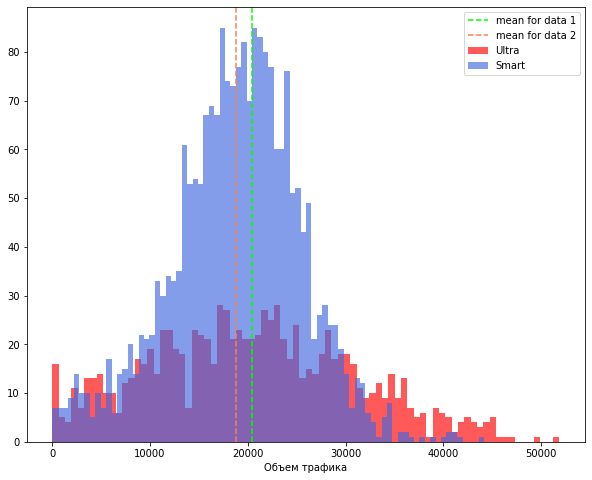

In [149]:
explorer.overlaid_histogram(df_ultra.mb_used, df_smart.mb_used, 80, data1_name="Ultra", 
                            data1_color="red", data2_name="Smart", 
                            data2_color="royalblue", x_label="Объем трафика")

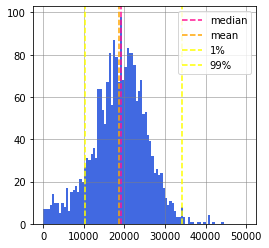

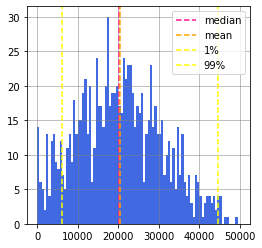

In [150]:
explorer.histogram(df_smart.mb_used, 90, 0, 50001, True)
explorer.histogram(df_ultra.mb_used, 90, 0, 50001, True)

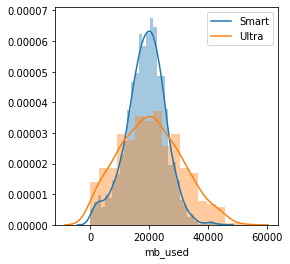

In [151]:
sns.distplot(df_smart.mb_used, kde_kws={'label': 'Smart'})
sns.distplot(df_ultra.mb_used, kde_kws={'label': 'Ultra'})

Визуально - оба датасета расперделены примерно одинаково. Среднее близко друг к другу.

**- проверим гипотезу об однородности распределений по критерию Смирнова** 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html

Сформулируем нулевую гипотезу

1) Нулевую гипотезу, которую проверяет тест, сформулируем так: "Выборка df_smart.mb_used и df_ultra.mb_used принадлежат одному закону распределения".

2) Альтернативную гипотезу, соответственно, сформулируем так: "Выборка df_smart.mb_used и df_ultra.mb_used ринадлежат разным законам распределения".

Примем уровень значимости в 5%.

In [152]:
alpha = 0.05

Проведем тест и получим p-значение

In [153]:
ks_stat, pval_ks = stats.ks_2samp(df_smart.mb_used, df_ultra.mb_used)
pval_ks

5.288443212729844e-21

Сравним p-значение с уровнем значимости

In [154]:
pval_ks < alpha

True

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Выборка df_smart.mb_used и df_ultra.mb_used принадлежат разным законам распределения.

In [155]:
explorer.pandahug(df_ultra.mb_used.describe()).T

,count,mean,std,min,25%,50%,75%,max
mb_used,985.0,20377.403046,10514.163927,0.0,12390.0,20170.0,27901.0,51854.0


In [156]:
explorer.pandahug(df_smart.mb_used.describe()).T

,count,mean,std,min,25%,50%,75%,max
mb_used,2229.0,18789.780619,6664.902104,0.0,14768.0,19196.0,23184.0,44161.0


In [157]:
print('Среднее количество для тарифа \"Ультра" ' + str(np.mean(df_ultra.mb_used)))
print('Среднее количество для тарифа \"Смарт" ' + str(np.mean(df_smart.mb_used)) + "\n")

print('Распределение для тарифа для тарифа \"Ультра" ' + str(np.var(df_ultra.mb_used)))
print('Распределение для тарифа \"Смарт" ' + str(np.var(df_smart.mb_used)))

Среднее количество для тарифа "Ультра" 20377.403045685278
Среднее количество для тарифа "Смарт" 18789.78061911171

Распределение для тарифа для тарифа "Ультра" 110435411.97867085
Распределение для тарифа "Смарт" 44400991.425627045


<p>&#9889; <b>Вывод:</b> 

    1) на гистограммах представлены распределения потребления трафика для каждого из тарифов,
    2) средние и медианы в обоих датасетах близки, что соответствует ожиданиям,
    3) также средние и медианы каждого из датасетов близки друг к другу,
    4) распределение наоборот сильно отличается: распределение для тарифа "Ультра" вдвое больше, чем для тарифа "Смарт",
    5) гистограммы в обоих случаях скошены вправо, хотя и производит впечатление правильного колокола,
    6) гистограмма тарифа "Смарт" - унимодальная, гистограмма тарифа "Ультра" мультимодальная,
    7) есть пользователи обоих тарифов, которые потребляют интернет как и значительно больше других, так и значительно меньше,
    8) но средний пользователь потребляет около 20Гб в месяц, независимо от тарифа,
    9) а различие в разбросе можно интерпретировать так, что пользователи тарифа "Ультра" менее внимательно относятся к трафику, поскольку предоставленный пакет кажется избыточным,
    10) меньший разброс у пользователей тарифа "Смарт" говорит о том, что в среднем пользователь много времени использует интернет, но также следит за трафиком, поскольку перерасход дорого обходиться. Дополнительно отметим, что пользователи тарифа "Смарт" балансируют на пределе предоставленного лимита, что должно вызывать раздражение.

**2) Построим гистограммы, посчитаем среднее количество, дисперсию и стандартное отклонение для расхода сообщений**

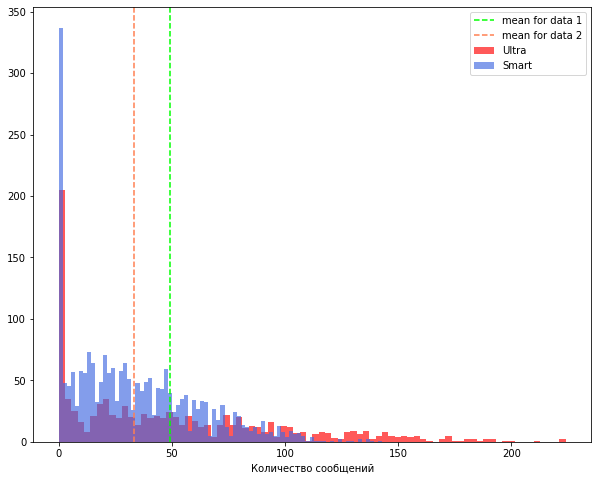

In [158]:
explorer.overlaid_histogram(df_ultra.message, df_smart.message, 80, data1_name="Ultra", 
                            data1_color="red", data2_name="Smart", 
                            data2_color="royalblue", x_label="Количество сообщений")

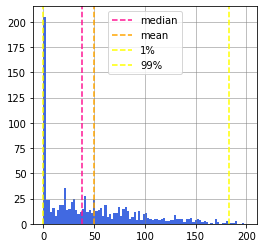

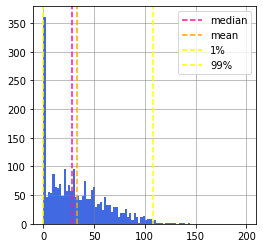

In [159]:
explorer.histogram(df_ultra.message, 90, 0, 200, True)
explorer.histogram(df_smart.message, 90, 0, 200, True)

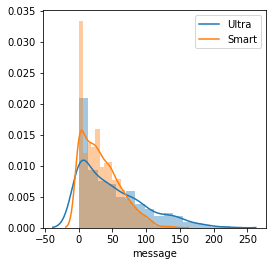

In [160]:
sns.distplot(df_ultra.message, kde_kws={'label': 'Ultra'})
sns.distplot(df_smart.message, kde_kws={'label': 'Smart'})

Визуально - при некотором сходстве форм, датасеты отличаются друг от друга. У датаста тарифа "Ультра" больше распределение средние датасетов разнесены.

**- проверим гипотезу об однородности распределений по критерию Смирнова** 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html

Сформулируем нулевую гипотезу

1) Нулевую гипотезу, которую проверяет тест, сформулируем так: "Выборка df_smart.message и df_ultra.message принадлежат одному закону распределения".

2) Альтернативную гипотезу, соответственно, сформулируем так: "Выборка df_smart.message и df_ultra.message принадлежат разным законам распределения".

Примем уровень значимости в 5%.

In [161]:
alpha = 0.05

Проведем тест и получим p-значение

In [162]:
ks_stat, pval_ks = stats.ks_2samp(df_smart.message, df_ultra.message)
pval_ks

2.9048366032697237e-20

Сравним p-значение с уровнем значимости

In [163]:
pval_ks < alpha

True

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Выборка df_smart.message и df_ultra.message принадлежат разным законам распределения.

In [164]:
print('Среднее количество для тарифа \"Ультра" ' + str(np.mean(df_ultra.message)))
print('Среднее количество для тарифа \"Смарт" ' + str(np.mean(df_smart.message)) + "\n")

print('Распределение для тарифа для тарифа \"Ультра" ' + str(np.var(df_ultra.message)))
print('Распределение для тарифа \"Смарт" ' + str(np.var(df_smart.message)))

Среднее количество для тарифа "Ультра" 49.36345177664975
Среднее количество для тарифа "Смарт" 33.384028712427096

Распределение для тарифа для тарифа "Ультра" 2282.946075394892
Распределение для тарифа "Смарт" 796.455482917076


In [165]:
explorer.pandahug(df_ultra.message.describe()).T

,count,mean,std,min,25%,50%,75%,max
message,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0


In [166]:
explorer.pandahug(df_smart.message.describe()).T

,count,mean,std,min,25%,50%,75%,max
message,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0


<p>&#9889; <b>Вывод:</b> 

    1) на гистограммах представлены распределения отправки смс для каждого из тарифов,
    2) средние и медианы в обоих датасетах разнесены,
    3) средние и медианы каждого из датасетов также разнесены по отношению к друг другу,
    4) равно как и распределение: распределние для тарифа "Ультра" втрое больше, чем для тарифа "Смарт",
    5) гистограммы в обоих случаях скошены вправо,
    6) обе гистограммы мультимодальные,
    7) в обоих тарифах есть один явный пик у нуля, это не ошибка; для такого пика есть несколько причин 
        - общее падение потребности в смс из-за интернета для обоих тарифов критично,
        - на пик влияет ничтожно маленький пакет смс для тарифа "Смарт".
    8) в датасете есть пользователи обоих тарифов, которые отправляют смс значительно больше других, но поскольку речь идет о незначительных цифрах в абсолютном выражении - вряд ли можно сделать их этого специальный вывод о каких-то особенностях потребления услуг связи и, конкретно, отправки смс.

**3) Построим гистограммы, посчитаем среднее количество, дисперсию и стандартное отклонение для расхода минут**

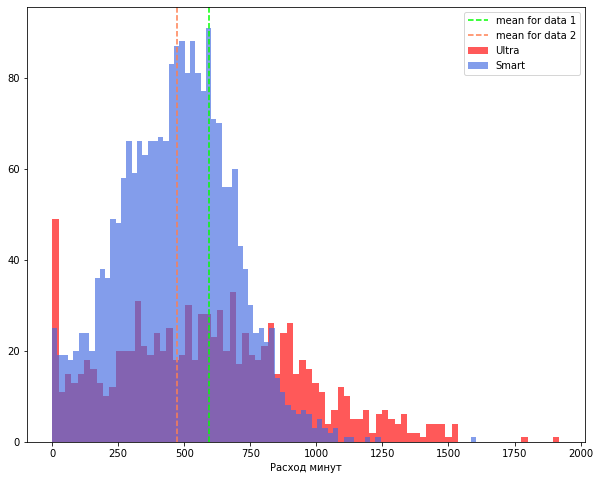

In [167]:
explorer.overlaid_histogram(df_ultra.duration, df_smart.duration, 80, data1_name="Ultra", 
                            data1_color="red", data2_name="Smart", 
                            data2_color="royalblue", x_label="Расход минут")

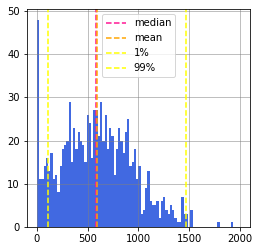

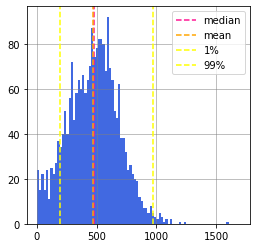

In [168]:
explorer.histogram(df_ultra.duration, 90, 0, 2000, True)
explorer.histogram(df_smart.duration, 90, 0, 1700, True)

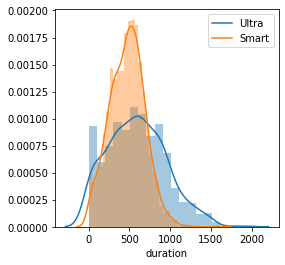

In [169]:
sns.distplot(df_ultra.duration, kde_kws={'label': 'Ultra'})
sns.distplot(df_smart.duration, kde_kws={'label': 'Smart'})

Визуально датасеты отличаются друг от друга, распределение датасета тарифа "Ультра" кажется больше. Средие и медины обоих датасетов близки.

**- проверим гипотезу об однородности распределений по критерию Смирнова** 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html

Сформулируем нулевую гипотезу

1) Нулевую гипотезу, которую проверяет тест, сформулируем так: "Выборка df_smart.duration и df_ultra.duration принадлежат одному закону распределения".

2) Альтернативную гипотезу, соответственно, сформулируем так: "Выборка df_smart.duration и df_ultra.duration принадлежат разным законам распределения".

Примем уровень значимости в 5%.

In [170]:
alpha = 0.05

Проведем тест и получим p-значение

In [171]:
ks_stat, pval_ks = stats.ks_2samp(df_smart.duration, df_ultra.duration)
pval_ks

1.6563538066422862e-36

Сравним p-значение с уровнем значимости

In [172]:
pval_ks < alpha

True

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Выборка df_smart.duration и df_ultra.duration принадлежат разным законам распределения.

In [173]:
print('Среднее количество для тарифа \"Ультра" ' + str(np.mean(df_ultra.duration)))
print('Среднее количество для тарифа \"Смарт" ' + str(np.mean(df_smart.duration)) + "\n")

print('Распределение для тарифа для тарифа \"Ультра" ' + str(np.var(df_ultra.duration)))
print('Распределение для тарифа \"Смарт" ' + str(np.var(df_smart.duration)))

Среднее количество для тарифа "Ультра" 592.2609137055838
Среднее количество для тарифа "Смарт" 471.41049798115745

Распределение для тарифа для тарифа "Ультра" 126475.00908139869
Распределение для тарифа "Смарт" 44957.49187723064


In [174]:
explorer.pandahug(df_ultra.duration.describe()).T

,count,mean,std,min,25%,50%,75%,max
duration,985.0,592.260914,355.813913,0.0,319.0,584.0,837.0,1920.0


In [175]:
explorer.pandahug(df_smart.duration.describe()).T

,count,mean,std,min,25%,50%,75%,max
duration,2229.0,471.410498,212.079396,0.0,320.0,480.0,611.0,1604.0


<p>&#9889; <b>Вывод:</b> 

    1) на гистограммах представлены распределения расхода минут для каждого из тарифов,
    2) средние и медианы в обоих датасетах близки к друг другу,
    3) средние и медианы каждого из датасетов близки друг к другу,
    4) распределение наоборот сильно ожидаемо отличается: распределние для тарифа "Ультра" втрое больше, чем для тарифа "Смарт",
    5) гистограммы в обоих случаях скошены вправо,
    6) гистограмма тарифа "Смарт" - унимодальная, гистограмма тарифа "Ультра" мультимодальная,
    7) есть пользователи обоих тарифов, которые звонят и сильно больше и сильно меньше других, но таких немного,
    8) средний пользователь разговаривает около 15 минут в день (500 / 30) , независимо от тарифа,
    9) различие в разбросе, скорее всего связано с тем, что пользователям тарифа "Ультра" предоставлен большой пакет минут, что влечет за собой склонность продлеать разговор, 
    10) а меньший разброс у пользователей тарифа "Смарт" говорит о том, что в среднем пользователь внимательнее следит за расходом минут, поскольку перерасход дорого обходиться,
    11) в случае с тарифом "Ультра" заметен пик у нуля - возможно, это связано с замещением телефонных звонков на интернет-звонки.
    12) поведенчески очень похоже на использование интернет-трафика.

# - проверим гипотезу: средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается.

Сравнивая две выборки, принимая во внимание задачи исследования, необходимо убедиться, что датасеты существенно отличаются друг от друга. В нашем случае вопрос в том, какой тариф принесет больше денег, требует установить так ли это.

Сформулируем нулевую гипотезу

1) Нулевую гипотезу, которую проверяет тест, можно сформулировать так: "Средняя выручка от пользователей тарифа "Смарт" и пользователей "Ультра" одинакова".

2) Альтернативную гипотезу, соответственно, сформулируем так: "Средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается".

Примем уровень значимости в 5 %.

In [176]:
alpha = 0.05

Проведем тест и получим p-значение

In [177]:
tstatistic, pval = ttest_ind(df_smart.total_monthly_fee, df_ultra.total_monthly_fee, equal_var = False)
pval

1.9666185804510423e-42

Сравним p-значение и уровень значимости

In [178]:
pval < alpha

True

&#9889; <b>Вывод:</b> исходя из представленных данных, на уровне значимости 5% - еcть основания отвергнуть нулевую гипотезу в пользу альтернативы</font>. Средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается.

# - проверим гипотезу: средняя выручка от пользователей из Москвы отличается от выручки пользователей из других регионов.

**Сделаем два среза по городу**

In [179]:
df_moscow = df_master.query('city == "Москва"')

In [180]:
df_russia = df_master.query('city != "Москва"')

**Выведем полученные таблицы, общую информацию**

In [181]:
df_moscow.sample(5)

,user_id,month,duration,mb_used,message,age,sex,city,churn,rub_monthly_fee,fee_internet,fee_messages,fee_calls,total_monthly_fee,tariff
864,1436,9,463,23567,24,75,m,Москва,False,1950,0.0,0,0,1950.0,ultra
884,1452,12,274,23357,54,74,f,Москва,False,1950,0.0,0,0,1950.0,ultra
2392,1308,5,221,21749,30,52,f,Москва,False,550,1277.8,0,0,1827.8,smart
1504,1115,8,714,11695,36,71,m,Москва,False,550,0.0,0,642,1192.0,smart
1022,1007,9,748,15618,31,65,f,Москва,False,550,51.6,0,744,1345.6,smart


In [182]:
df_moscow.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,611.0,1268.872340,137.530432,1001.0,1171.0,1291.0,1385.0,1490.0
month,611.0,8.432079,2.888057,1.0,6.0,9.0,11.0,12.0
duration,611.0,527.302782,268.996371,0.0,338.0,508.0,687.5,1530.0
mb_used,611.0,19956.587561,8199.832059,365.0,14921.5,19859.0,25026.5,44600.0
message,611.0,37.877250,37.160304,0.0,6.5,29.0,57.0,191.0
age,611.0,44.906710,17.414978,18.0,29.0,43.0,58.0,75.0
rub_monthly_fee,611.0,1065.548282,675.814374,550.0,550.0,550.0,1950.0,1950.0
fee_internet,611.0,633.961129,851.707184,0.0,0.0,139.2,1153.2,5081.6
fee_messages,611.0,7.536825,25.858566,0.0,0.0,0.0,0.0,177.0
fee_calls,611.0,124.389525,268.329640,0.0,0.0,0.0,55.5,1845.0


In [183]:
df_russia.sample(5)

,user_id,month,duration,mb_used,message,age,sex,city,churn,rub_monthly_fee,fee_internet,fee_messages,fee_calls,total_monthly_fee,tariff
2691,1388,10,498,29709,0,24,m,Вологда,False,550,2869.8,0,0,3419.8,smart
2180,1262,5,461,25358,50,21,f,Ульяновск,False,550,1999.6,0,0,2549.6,smart
1570,1130,4,430,17900,63,58,f,Тюмень,False,550,508.0,39,0,1097.0,smart
2968,1446,11,710,18664,32,64,f,Липецк,False,550,660.8,0,630,1840.8,smart
1586,1133,12,690,17125,31,70,f,Барнаул,False,550,353.0,0,570,1473.0,smart


In [184]:
df_russia.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2603.0,1247.533615,146.011387,1000.0,1120.0,1241.0,1377.0,1499.0
month,2603.0,8.290434,2.909368,1.0,6.0,9.0,11.0,12.0
duration,2603.0,504.021898,270.477866,0.0,316.5,497.0,657.5,1920.0
mb_used,2603.0,19116.668459,8037.831460,0.0,14186.5,19221.0,23836.5,51854.0
message,2603.0,38.376104,35.913289,0.0,9.5,30.0,57.0,224.0
age,2603.0,47.048790,16.362308,18.0,34.0,47.0,62.0,75.0
rub_monthly_fee,2603.0,958.759124,636.658834,550.0,550.0,550.0,1950.0,1950.0
fee_internet,2603.0,721.400250,922.378488,0.0,0.0,266.8,1271.9,5760.2
fee_messages,2603.0,13.130619,36.184447,0.0,0.0,0.0,0.0,279.0
fee_calls,2603.0,153.674222,309.318397,0.0,0.0,0.0,178.5,3312.0


**1) Сформулируем нулевую гипотезу**

Для проверки снова используем 2 Sample T-Test. Поскольку проверяем есть ли существенные различия между средними двух выборок, то и в этом случае нулевая гипотеза состоит в том, что оба распределения имеют одинаковое среднее значение. 

**Сформулирум нулевую гипотезу: "Средняя выручка от пользователей из Москвы и от пользователей из других регионов одинакова".**

**Альтернативную гипотеза, соответственно, сформулируем так: "Средняя выручка от пользователей из Москвы и от пользователей из других регионов различается".**

**Проведем тест и получим p-значение, используем тот же уровень значимости - 0.05.**

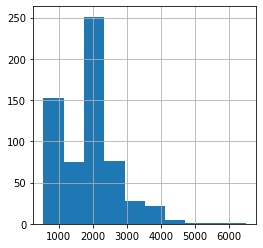

In [185]:
df_moscow.total_monthly_fee.hist()

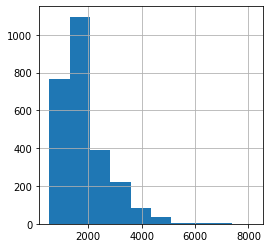

In [186]:
df_russia.total_monthly_fee.hist()

In [187]:
tstatistic, pval = ttest_ind(df_moscow.total_monthly_fee, df_russia.total_monthly_fee, equal_var = False)
pval

0.6972737809889945

**Сравним p-значение и уровень значимости**

In [188]:
pval < alpha

False

&#9889; <b>Вывод:</b> исходя из представленных данных, на уровне значимости 5% - нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.</font> Средняя выручка от пользователей из Москвы и от пользователей из других регионов одинакова.

## - исследуем группу пользователей, которые расторгли договор</font>

In [189]:
users.describe(include = ['object']).T

,count,unique,top,freq
churn_date,38,33,2018-12-21,2
city,500,76,Москва,99
first_name,500,246,Радим,6
last_name,500,419,Андреенко,5
reg_date,500,270,2018-05-28,8
tariff,500,2,smart,351
churn,500,2,False,462
sex,500,2,f,256


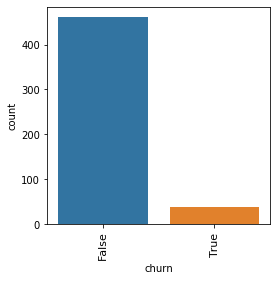

In [190]:
explorer.categorical_counter_plot(users, 'churn', 4, 4)

Почти 8 % расторгли договор (38 из 500). Проверим пользователи каких тарифов расторгли договор

In [191]:
users.query('churn == True').tariff.value_counts()

smart    23
ultra    15
Name: tariff, dtype: int64

Расторженцы есть в обоих тарифах. Построим диаграммы для пар признаков: продолжительность звонков, расхода интернета, сообщений, суммы ежемесячных затрат и факта расторжения договора

D:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


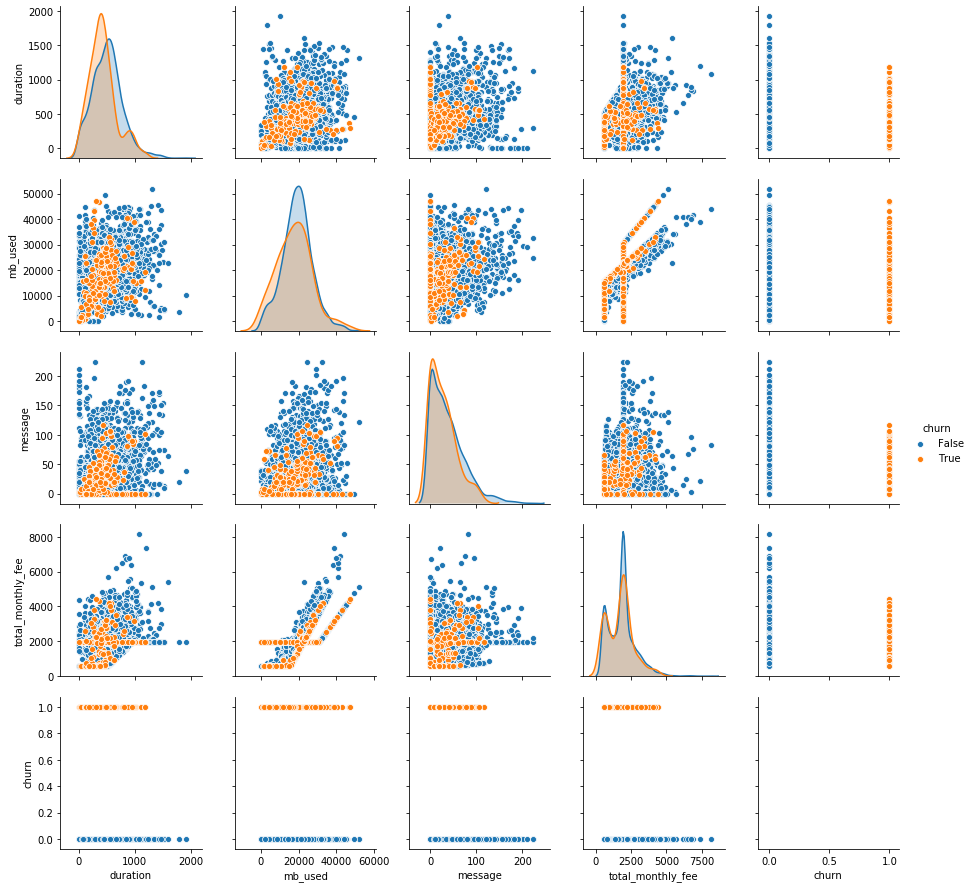

In [192]:
sns.pairplot(df_master[['duration', 'mb_used', 'message', 'total_monthly_fee', 'churn']], hue='churn');

Получим срез с расторгнувшими договор пользователями и срез без расторгнувших договор пользователей

In [193]:
df_churn = df_master.query('churn == True')

In [194]:
df_not_churn = df_master.query('churn == False')

&#9889; **Вывод:** похоже, расторгнувшие договор пользователи не пользовались услугами сильно больше других (и даже наоборот, умереннее других) и не выделяются по переплатам. Вероятно, для этих пользвателей пакеты услуг были просто избыточными. Проверим несколько гипотез с помощью 2 Sample T-Test.

# - проверим гипотезу: средние затраты расторгнувших договор пользователей и затраты дргуих пользователей различаются.

Сформулируем нулевую гипотезу

1) Нулевую гипотезу, которую проверяет тест, сформулируем так: "Средние затраты расторгнувших договор пользователей и затраты дргуих пользователей одинаковы".

2) Альтернативную гипотезу, соответственно, сформулируем так: "Средние затраты расторгнувших договор пользователей и затраты других пользователей различаются".

Примем уровень значимости в 5%.

In [195]:
alpha = 0.05

Проведем тест и получим p-значение

In [196]:
tstatistic, pval = ttest_ind(df_churn.total_monthly_fee, df_not_churn.total_monthly_fee, equal_var = False)
pval

0.05730707491147221

Сравним p-значение и уровень значимости

In [197]:
pval < alpha

False

In [198]:
df_churn.shape,df_not_churn.shape

((187, 15), (3027, 15))

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Средние затраты расторгнувших договор пользователей и затраты дргуих пользователей одинаковы.

# - проверим гипотезу: средняя продолжительность звонков расторгнувших договор пользователей и средняя продолжительность звонков дргуих пользователей различаются.

Сформулируем нулевую гипотезу

1) Нулевую гипотезу, которую проверяет тест, сформулируем так: "Средняя продолжительность звонков расторгнувших договор пользователей и средняя продолжительность звонков дргуих пользователей одинаковы".

2) Альтернативную гипотезу, соответственно, сформулируем так: "Средняя продолжительность звонков расторгнувших договор пользователей и средняя продолжительность звонков дргуих пользователей различаются".

Примем уровень значимости в 5%.

In [199]:
tstatistic, pval = ttest_ind(df_churn.duration, df_not_churn.duration, equal_var = False)
pval

1.628515716983631e-05

Сравним p-значение и уровень значимости

In [200]:
pval < alpha

True

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. средняя продолжительность звонков расторгнувших договор пользователей и средняя продолжительность звонков дргуих пользователей различаются.

# - проверим гипотезу: средний расход трафика расторгнувших договор пользователей и средний расход трафика других пользователей различаются.

Сформулируем нулевую гипотезу


1) Нулевую гипотезу, которую проверяет тест, сформулируем так: "Средний расход трафика расторгнувших договор пользователей и средний расход трафика других пользователей одинаков.".

2) Альтернативную гипотезу, соответственно, сформулируем так: "Средний расход трафика расторгнувших договор пользователей и средний расход трафика других пользователей различаются.".

Примем уровень значимости в 5%.

In [201]:
tstatistic, pval = ttest_ind(df_churn.mb_used, df_not_churn.mb_used, equal_var = False)

Сравним p-значение и уровень значимости

In [202]:
pval < alpha

True

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средний расход трафика расторгнувших договор пользователей и средний расход трафика других пользователей различаются.

# - проверим гипотезу: среднее количество смс расторгнувших договор пользователей и среднее количество смс других пользователей различаются.

Сформулируем нулевую гипотезу

1) Нулевую гипотезу, которую проверяет тест, сформулируем так: "Среднее количество смс расторгнувших договор пользователей и среднее количество смс других пользователей одинаково".

2) Альтернативную гипотезу, соответственно, сформулируем так: "Среднее количество смс расторгнувших договор пользователей и среднее количество смс других пользователей различаются".

Примем уровень значимости в 5%.

In [203]:
tstatistic, pval = ttest_ind(df_churn.message, df_not_churn.message, equal_var = False)

Сравним p-значение и уровень значимости

In [204]:
pval < alpha

True

&#9889; **Вывод:** исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Среднее количество смс расторгнувших договор пользователей и среднее количество смс других пользователей различаются.

# - с учетом результатов тестов и исследвания, посмотрим основные статистики в каждом из датасетов с помощью метода describe()

In [205]:
churn = df_churn.describe().T
not_churn = df_not_churn.describe().T
Display('churn', 'not_churn')

,count,mean,std,min,25%,50%,75%,max
user_id,187.0,1219.572193,151.512585,1019.0,1064.0,1232.0,1355.0,1498.00
month,187.0,7.850267,2.780314,1.0,6.0,8.0,10.0,12.00
duration,187.0,431.844920,243.009342,11.0,271.5,402.0,542.0,1186.00
mb_used,187.0,17880.016043,9414.656473,0.0,11061.5,18013.0,23526.0,47221.00
message,187.0,28.550802,28.157417,0.0,1.0,22.0,44.0,117.00
age,187.0,48.481283,15.516326,20.0,37.0,50.0,60.0,75.00
rub_monthly_fee,187.0,1118.983957,689.475829,550.0,550.0,550.0,1950.0,1950.00
fee_internet,187.0,563.153476,853.972475,0.0,0.0,0.0,1041.8,3521.40
fee_messages,187.0,5.534759,23.277952,0.0,0.0,0.0,0.0,168.00
fee_calls,187.0,32.711230,122.444510,0.0,0.0,0.0,0.0,948.00


&#9889; **Вывод:** пользователи, расторгнувшие договор в среднем меньше звонили, пользовались интернетом и отправляли сообщений. С некоторой осторожностью, можно предположить, что причиной расторжения договора является отсутвие потребности в таких пакетах услуг за предложенную цену - все таки поведение этой группы пользователей похоже, это обособленная группа, но для серьезного ответа не хватает данных об этих пользователях.

## Вывод

**1. В результате исследования установлено:** 

    1) в датасете есть выбросы, но выбросы мало влияют на медиану,
    
    2) в данном случае выбросы не искажают выборку, а играют важную роль в сути явления, в понимании поведения пользователей и, в конечном счете, от выбросов зависит окончательное принятие решения о том, «какой тариф лучше»,
    
    3) оба тарифа от месяца к месяцу приносят больше, но выручка по тарифу "Смарт" приносит и более высокую общую ежемесячную выручку, и демонстрирует значительно более высокий рост от месяца к месяцу,
    
    4) причина в том, что количество пользователей тарифом "Смарт" больше в два раза, чем количество пользователей "Ультра",
    
    5) медианный платеж от пользователя тарифом "Ультра" выше, чем от пользователя тарифа "Смарт", но медианный платеж тарифа "Смарт" показывает неуклонный рост и приближается к медианному платежу пользователей тарифа "Ультра",

    6) среди пользователей тарифа выделяется группа, которая из-за перерасхода переплачивает за услуги.  Эти 240 пользователей (68 %) тарифа "Смарт" очень нас интересуют: их можно и нужно подтолкнуть к тарифу "Ультра", для них переход должен быть почти самоочевидным. Поэтому группа - очевидная цель для рекламы: переход на тариф "Ультра" должен быть для таких пользователей логичным и безболезненным шагом.
    

**2. Были посчитаны среднее количество, дисперсию и стандартное отклонение для каждого из тарифов:**

    1) в отношении расхода интернет-трафика было установлено, что средние и медианы в обоих датасетах близки, что соответствует ожиданиям; средние и медианы каждого из датасетов близки друг к другу, а распределение сильно отличается: распределение для тарифа "Ультра" вдвое больше, чем для тарифа "Смарт"; средний пользователь потребляет около 20Гб в месяц, независимо от тарифа.
    
    2) в отношении расхода пакета смс было установлено, что средние и медианы в обоих датасетах разнесены; средние и медианы каждого из датасетов также разнесены по отношению к друг другу; распределние для тарифа "Ультра" втрое больше, чем для тарифа "Смарт"; пользователи тарифа "Ультра" отправляют на треть больше смс, чем пользователи тарифа "Смарт".
    
    3) в отношении расхода минут было установлено, что средние и медианы в обоих датасетах близки к друг другу, рано как и средние и медианы каждого из датасетов; распределение отличается: распределние для тарифа "Ультра" втрое больше, чем для тарифа "Смарт"; средний пользователь разговаривает около 15 минут в день (500 / 30) , независимо от тарифа.


**3. Была проверена гипотеза: средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается. Исходя из представленных данных, на уровне значимости 5% - еcть основания отвергнуть нулевую гипотезу в пользу альтернативы. Средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается**

**4. Были проверена гипотеза: средняя выручка от пользователей из Москвы отличается от выручки пользователей из других регионов. Исходя из представленных данных, на уровне значимости 5% - нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Средняя выручка от пользователей из Москвы и от пользователей из других регионов одинакова**

**5. Была проверены гипотезы:** 
    
<ol>1) среднее количество смс расторгнувших договор пользователей и среднее количество смс других пользователей различаются;</ol>
<ol>2) средний расход трафика расторгнувших договор пользователей и средний расход трафика других пользователей различаются;</ol>
<ol>3) средняя продолжительность звонков расторгнувших договор пользователей и средняя продолжительность звонков дргуих пользователей различаются.</ol>

Исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевые гипотезы в пользу альтернатив. Средние продолжительности звонков, расхода интернета и собщений пользователей расторгнувших договор и средние продолжительности звонков, расхода интернета и собщений остальных пользователей различаются. С помощью метода describe() выяснили, что эти пользователи потребляли, в среднем, меньший объем услуг. Обособленная группа, но для выявления причин расторжения договора и, как следствие, дополнительных выводов - данных 
недостаточно. 



# V. Выводы <a class="anchor" id="6"></a>

1. Тариф "Ультра" приносит большую медианную выручку от каждого пользователя, в долгосрочной перспективе выглядит привлекательнее для компании, поскольку позволяет при тех же издержках получать стабильно более высокую прибыль.


2. Поэтому нужно стремиться увеличивать число пользователей тарифа "Ультра". И поскольку медианный платеж от пользователей тарифа "Смарт" неуклонно растет и приближается к медианному платежу пользователя тарифа "Ультра": представляется, что оптимальный способ - привлечение клинетов дешевым тарифом "Смарт", а затем планомерное подталкивание пользователей к переходу на тариф "Ультра".


3. Исходим из того, что тариф "Смарт" изначально был сформирован с учетом потребностей среднего пользователя в услугах связи: при умеренной цене и внешне приличном пакете услуг  - у пользователя ежемесячно формируется потребность в больших пакетах интернета, минут и сообщений. Пользователь все время на грани, когда имеющегося пакета тарифа "Смарт" не хватает.


4. Важно, чтобы пользователь тарифа "Смарт" винил себя в перерасходе. Для этого нужно отказаться в данном тарифе от навязчивых предолжений дополнительных "мусорных" услуг - ненужных подписок, мелодий звонка и прочее. Так, чтобы у пользователя не возникало ненужных связей между перерасходом и навязанными услугами.


5. Поэтому нужно сохранить оба тарифа, чтобы создать видимость альтернативы. Тогда перход от дешевого тарифа к более дорогому тарифу будет восприниматься пользователем как рациональный шаг, а не результат давления из вне. 


6. Для оценки срока реализации необходимо данные за более длительный период, но принципиальная точка на которую следует ориентироваться - формирование регулярного перерасхода у пользователей. Это означает, что переключение пользователя от одного тарифа к другому, принимая во внимаение общую инертность, вероятно должен занять от полугода до года: так чтобы перерасход стал регулярным.

**Ограничения исследования:**

1. Задача изначально сформулирована неясно - "какой тариф лучше". 
2. В отсутвие возможности уточнить задачу для лучшего понимания и уяснения цели, задача уточнена до вопроса "какой тариф приносит больше денег".
2. В данном случае, данные вряд ли являются настоящими. Данные похожи на настоящие, но не более того. Но при исследовании, принимая во внимание учебные цели, данные презюмируются как полностью реальные.
4. Исходя из учебного контекста задачи сформирован финальный вывод. Очевидно, что в реальности ситуация потребует гораздо более глубокого анализа.